# RELATÓRIO DE ANÁLISE — Adult Census Income Dataset (Kaggle)

# 1. Visão Geral e Objetivo
Instituições financeiras enfrentam o desafio constante de alinhar seus produtos de investimento ao perfil e à capacidade financeira de seus clientes. Nesse cenário, a análise correta de informações socioeconômicas e comportamentais é fundamental para compreender as necessidades e expectativas de cada indivíduo.

O presente estudo propõe o desenvolvimento de um modelo preditivo para segmentação de clientes. Para tal, utiliza-se o conjunto de dados *Adult Census Income*, que contém variáveis demográficas essenciais — como idade, escolaridade, ocupação, estado civil e horas de trabalho — simulando as informações tipicamente coletadas em questionários de "Perfil de Investidor" (API).

A hipótese central é que indivíduos com renda anual superior a 100 mil dólares apresentam padrões socioeconômicos distintos, passíveis de modelagem estatística. Ao identificar com precisão esse perfil, a instituição pode direcionar a oferta de fundos de investimento exclusivos e produtos *premium* de forma proativa.

Assim, a pesquisa busca responder: **quais variáveis demográficas mais influenciam a classificação de um indivíduo no grupo de maior renda e como utilizar essas predições para otimizar a estratégia comercial?**

A aplicação deste modelo visa impactar diretamente indicadores de negócio, mitigando dois problemas principais:
1.  **Oferta Ineficiente:** Evitar o direcionamento de produtos genéricos a clientes sofisticados, otimizando recursos de marketing.
2.  **Custo de Oportunidade:** Reduzir a falha na identificação de clientes com alto potencial de aporte, maximizando a Taxa de Conversão e a retenção de carteiras de alto valor.

# 2. Requisitos Detalhados do Projeto

## 2.1. Seleção do Conjunto de Dados (Dataset)

Dataset: Adult Census Income. https://www.kaggle.com/datasets/priyamchoksi/adult-census-income-dataset

Conteúdo: Dados extraídos do banco de dados do Censo de 1994 realizado nos Estados Unidos.

Tarefa: Verificar se uma pessoa ganha mais de $ 100.000 por ano.

Tipo de Atividade: Classificatória

Target: "income" (renda)

#### Descrição dos Dados

| Feature            | Descrição                                                                                 |
| ------------------ | ----------------------------------------------------------------------------------------- |
| **age**            | Idade do indivíduo (em anos).                                                             |
| **workclass**      | Tipo de vínculo empregatício (ex.: Private, Federal-gov).                                 |
| **fnlwgt**         | Peso amostral do censo (*final weight*), indicando quantas pessoas o registro representa. |
| **education**      | Nível de escolaridade concluído.                                                          |
| **education.num**  | Escolaridade convertida para um valor numérico.                                           |
| **marital.status** | Estado civil do indivíduo (ex.: Married-civ-spouse, Divorced).                            |
| **occupation**     | Profissão exercida pelo indivíduo.                                                        |
| **relationship**   | Relação familiar na residência (ex.: Husband, Not-in-family).                             |
| **race**           | Raça/etnia declarada.                                                                     |
| **sex**            | Sexo informado.                                                                           |
| **capital.gain**   | Ganho anual de capital (ex.: investimentos).                                              |
| **capital.loss**   | Perda anual de capital.                                                                   |
| **hours.per.week** | Número de horas trabalhadas por semana.                                                   |
| **native.country** | País de origem do indivíduo.                                                              |
| **income**         | Target: indica se a renda anual é `<=100K` ou `>100K`.                                      |


#### Feature: `fnlwgt`

O atributo vem do banco de dados do Censo dos EUA de 1994, usado neste Dataset Adult Income Dataset (também chamado de Census Income Dataset).

Função:
    Cada pessoa registrada no dataset não corresponde apenas a si mesma, mas a um número maior de pessoas com características semelhantes na população.
    O fnlwgt é esse número — o peso que o censo atribuiu para garantir que a amostra seja representativa da população.

Exemplo prático:

    Se um indivíduo tem fnlwgt = 200000, significa que, estatisticamente, ele representa cerca de 200 mil pessoas com perfil semelhante (idade, escolaridade, ocupação etc.).

Em suma:
- Representa o **peso amostral** atribuído pelo censo a cada registro.  
- Indica **quantas pessoas na população real (EUA) possuem características semelhantes** ao indivíduo da amostra.  
- Serve para análises estatísticas representativas da população.  
- Em tarefas de *machine learning*, geralmente é **descartado no treinamento**, pois não descreve diretamente o indivíduo.


## 2.1.1 Metodologia e Etapas do Projeto

O projeto seguirá o fluxo de trabalho clássico de Machine Learning (ML), dividido nas seguintes etapas principais:

#### 1. Pré-processamento e Análise Exploratória (EDA)
*   **Tratamento de Missing Values** (Especial atenção aos caracteres "?" no dataset).
*   **Análise de Viés:** Verificação da distribuição de renda por gênero e raça para entender disparidades históricas nos dados.
*   **Codificação de Variáveis** (*Encoding*) e **Escalonamento**.

#### 2. Modelagem Preditiva
*   **Definição de Baseline:** Criação de um marco zero de performance.
*   **Seleção de Algoritmos:** Testes com Regressão Logística (para interpretabilidade) e Ensemble Methods como Random Forest e XGBoost (para performance).
*   **Otimização de Hiperparâmetros** para maximizar a generalização.

#### 3. Avaliação de Desempenho
*   **Foco no Desbalanceamento:** Como a classe "Alta Renda" é minoritária, a **Acurácia** será analisada em conjunto com:
    *   **Precision & Recall:** Para equilibrar o custo de perder um cliente rico *versus* o custo de ofertar errado.
    *   **F1-Score e Curva ROC-AUC:** Para uma visão global da robustez do modelo.

#### 4. Interpretabilidade do Modelo
*   **Feature Importance:** Identificação das variáveis que mais pesam na decisão.
*   **Explicação de Negócio:** Tradução dos pesos matemáticos em *insights* comportamentais para a equipe comercial.



## 2.2. Definição do Problema de Negócio

A pesquisa procura responder: **quais variáveis do perfil de investidor mais influenciam a classificação de clientes como alta renda e como essas informações podem ser utilizadas para otimizar a estratégia de oferta de fundos de investimento?**

O presente estudo propõe a utilização do **Machine Learning (ML)** aplicado a dados socioeconômicos (simulados pelo *Adult Census Income Dataset*) para criar uma **ferramenta preditiva** de classificação de clientes.

#### Objetivo Central

Construir um **Modelo de Classificação Binária** capaz de prever, com alta acurácia, quais clientes pertencem ao segmento de **Alta Renda** (renda anual simulada **acima de $100.000**), com base em variáveis de perfil (idade, educação, ocupação, etc.).

#### Hipótese Central

Variáveis demográficas e de emprego coletadas no "Questionário de Perfil" do cliente possuem **padrões estatisticamente significativos** que diferenciam os clientes de alta renda, e o ML é a ferramenta ideal para capturar essa não-linearidade.

#### Impacto Estratégico e Valor Agregado

A implantação de um modelo preditivo como este em ambiente de produção oferece vantagens estratégicas imediatas:

* **Otimização de *Cross-Selling***: Permite que a área comercial direcione de forma **proativa e personalizada** a oferta de **Fundos de Investimento Exclusivos, Previdência Privada e *Wealth Management*** apenas para o grupo de clientes com maior probabilidade de conversão.
* **Melhoria do *Customer Experience***: Reduz a frustração do cliente ao garantir que as recomendações de investimento sejam altamente **relevantes e alinhadas** com seu potencial financeiro.
* **Base para *Credit Scoring***: A técnica de modelagem de classificação e a análise das **variáveis preditivas mais importantes** (*feature importance*) fornecem *insights* valiosos que podem ser estendidos para outros modelos críticos do banco, como risco de crédito e detecção de fraude.

**Em suma:** Este projeto demonstra a capacidade de transformar dados estáticos de questionário em **inteligência de negócios acionável**, posicionando a instituição na vanguarda da **tomada de decisão orientada por dados** no mercado financeiro.


## 2.3 Pré-processamento e Engenharia de Features

#### Importação das Bibliotecas

In [194]:
%pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df = pd.read_csv("/content/adult_census_income.csv", sep=';')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=100K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=100K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=100K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=100K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=100K


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Total de Registros: 32.561

Estrutura:

| #  | Column          | Non-Null Count | Dtype  |
|----|-----------------|----------------|--------|
| 0  | age             | 32561 non-null | int64  |
| 1  | workclass       | 32561 non-null | object |
| 2  | education       | 32561 non-null | object |
| 3  | education.num   | 32561 non-null | int64  |
| 4  | marital.status  | 32561 non-null | object |
| 5  | occupation      | 32561 non-null | object |
| 6  | relationship    | 32561 non-null | object |
| 7  | race            | 32561 non-null | object |
| 8  | sex             | 32561 non-null | object |
| 9  | capital.gain    | 32561 non-null | int64  |
| 10 | capital.loss    | 32561 non-null | int64  |
| 11 | hours.per.week  | 32561 non-null | int64  |
| 12 | native.country  | 32561 non-null | object |
| 13 | income          | 32561 non-null | object |


#### Tratamento de Valores Nulos

Há campos de texto com valores <b>"?"</b> que devem ser tratados como <b>Nulos</b>. Neste caso, precisamos substituir todos  eles por <i>Null</i>

In [197]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Agora substitui o "?" limpo
df = df.replace("", np.nan) # Replacing empty strings which might result from stripping
df = df.replace("?", np.nan)

df['workclass'] = df['workclass'].fillna('other')
df['occupation'] = df['occupation'].fillna('other')
df['native.country'] = df['native.country'].fillna('United-States')

Visualização dos dados tratados:

In [198]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,other,77053,HS-grad,9,Widowed,other,Not-in-family,White,Female,0,4356,40,United-States,<=100K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=100K
2,66,other,186061,Some-college,10,Widowed,other,Unmarried,Black,Female,0,4356,40,United-States,<=100K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=100K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=100K


Verificando se há valores nulos que precisam ser tratados

In [199]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


Notamos que as features <b>workclass</b>, <b>occupation</b> e <b>native.country</b> contém valores nulos. Tratamentos:
 - <i>workclass</i>: é o tipo de contrato de tabalho, vamos substituir nulos por "outros";
 - <i>occupation</i>: é o cargo exercido. Como pode ser que a pessoa não esteja trabalhando, vamos também substituir por "outros";
 - <i>native.country</i>: país de origem da pessoa. Podemos deixar como "outros" mas, levando em consideração que <b>United-States</b> representa mais de 90%, podemos substituir por "United-States"

In [200]:
df['native.country'].value_counts(normalize=True)

,proportion
native.country,
United-States,0.913762
Mexico,0.019748
Philippines,0.006081
Germany,0.004207
Canada,0.003716
Puerto-Rico,0.003501
El-Salvador,0.003255
India,0.003071
Cuba,0.002918


A coluna occupation já possui uma categoria chamada Other-service. Para não misturar, usar o termo "Desconhecido" ou "Nao-Informado" em vez de apenas "Outros".

In [201]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


Vamos agora remover a feature <b>fnlwgt</b> por não ser relevante para o projeto. Conforme vimos no início, trata-se de uma variável estatística inserida pelo Censu de modo a refletir as características da população real.

In [202]:
df = df.drop('fnlwgt', axis=1)
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,other,HS-grad,9,Widowed,other,Not-in-family,White,Female,0,4356,40,United-States,<=100K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=100K
2,66,other,Some-college,10,Widowed,other,Unmarried,Black,Female,0,4356,40,United-States,<=100K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=100K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=100K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=100K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=100K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>100K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=100K






Vamos agora verificar se a feature <b>age (idade)</b> possui algum valor anormal:

In [203]:
print("Idade mínima:", df["age"].min())
print("Idade máxima:", df["age"].max())

Idade mínima: 17
Idade máxima: 90


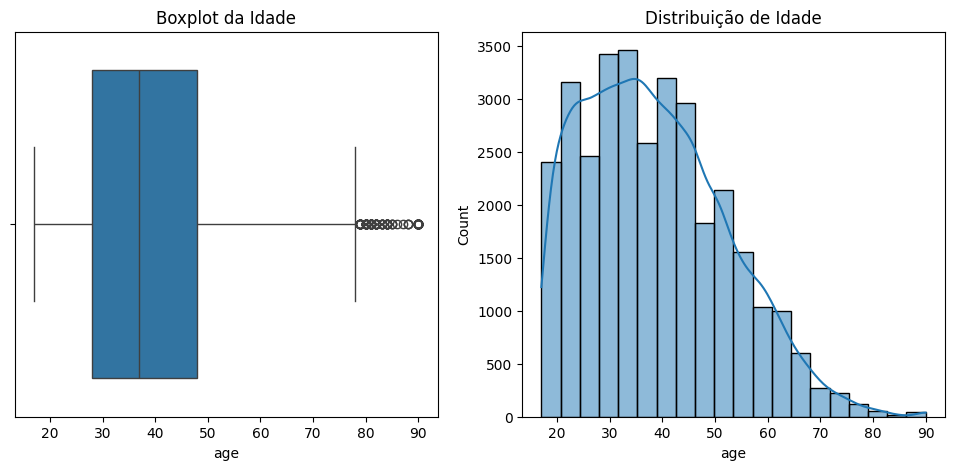

In [204]:
# 2. Visualização Gráfica (Para ver a distribuição e outliers)
plt.figure(figsize=(12, 5))

# Boxplot: Os pontos fora dos "bigodes" são estatisticamente outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title('Boxplot da Idade')

# Histograma: Para ver a concentração
plt.subplot(1, 2, 2)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribuição de Idade')

plt.show()

Com base nos gráficos gerados:

**1. Análise da Distribuição (Histograma - Direita)**
*   **Assimetria à Direita (Right-Skewed):** A curva mostra claramente uma assimetria positiva. A grande massa de dados (o pico) está concentrada em indivíduos mais jovens, especificamente entre **20 e 40 anos**.
*   **Força de Trabalho:** Isso reflete a realidade demográfica do mercado de trabalho: há muito mais pessoas no início e meio de carreira do que no final (pós-aposentadoria).
*   **Cauda Longa:** A curva desce suavemente até os 90 anos, confirmando que há dados representativos de todas as faixas etárias, mas com menor frequência nas idades avançadas.

**2. Análise de Outliers e Quartis (Boxplot - Esquerda)**
*   **Mediana e Quartis:**
    *   A linha central do boxplot (Mediana) está em aproximadamente **37 anos**.
    *   50% das pessoas (a caixa azul) têm entre ~28 (1º quartil) e ~48 anos (3º quartil).
*   **Os "Outliers":**
    *   Observe os pontos pretos (círculos) à direita do gráfico. Eles começam a aparecer por volta dos **78 anos** e vão até **90 anos**.
    *   Estatisticamente, eles são *outliers* (pois estão distantes da média).

**Resumo para o relatório:**
> "A variável `age` apresenta uma distribuição assimétrica à direita, com mediana de 37 anos. Embora o Boxplot indique a presença de outliers estatísticos acima de 78 anos, optou-se por **mantê-los**, pois representam uma parcela válida da população (idosos) que é estrategicamente relevante para a oferta de produtos de investimento e gestão de patrimônio."

In [205]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB
None


In [206]:
# Verificar quantas linhas são duplicatas exatas
duplicatas = df.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {duplicatas}")

# Remover duplicatas (Mantenha a primeira ocorrência)
if duplicatas > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicatas removidas com sucesso!")
    print(f"Novo shape do dataset: {df.shape}")

Quantidade de linhas duplicadas: 3533
✅ Duplicatas removidas com sucesso!
Novo shape do dataset: (29028, 14)


### Análise Exploratória

Descrição Estatística (apenas colunas numéricas)

In [207]:
colunas_numericas = ["age", "capital.gain", "capital.loss", "hours.per.week"]
df[colunas_numericas].describe()

,age,capital.gain,capital.loss,hours.per.week
count,29028.000000,29028.000000,29028.000000,29028.000000
mean,39.261506,1200.608137,97.402818,40.643069
std,13.688441,7787.114395,424.478474,12.745075
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,38.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Distribuições das variáveis numéricas:

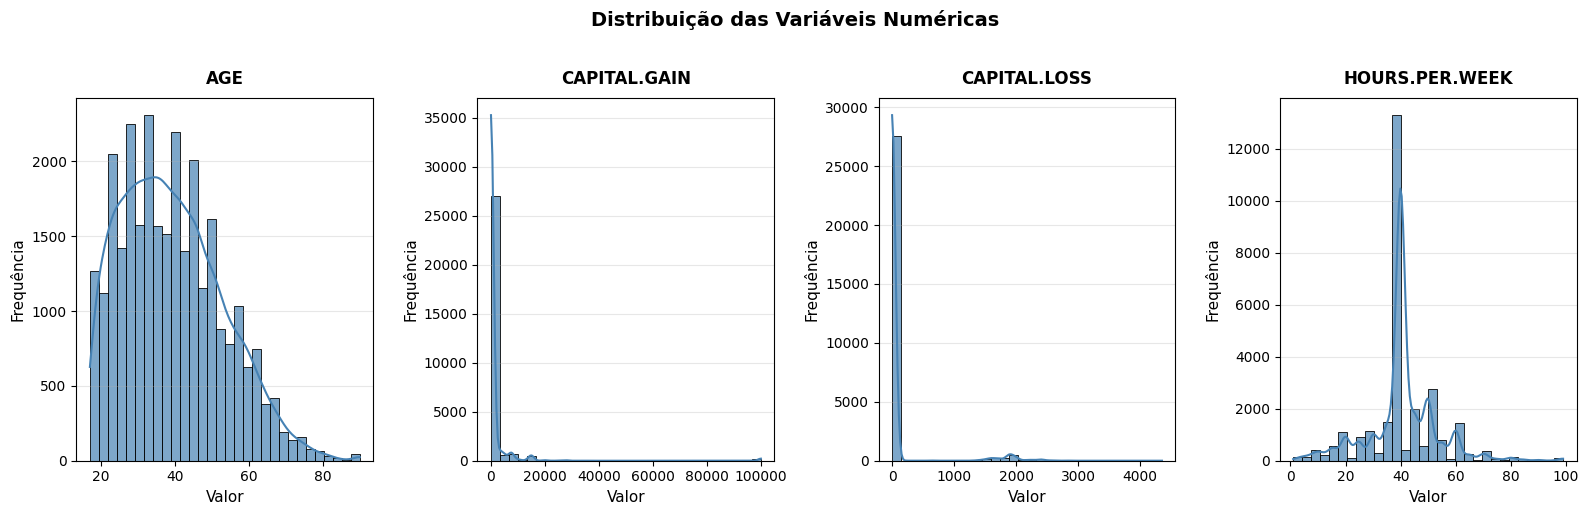

In [208]:
# Distribuições das variáveis numéricas
colunas_numericas = ["age", "capital.gain", "capital.loss", "hours.per.week"]

n_cols = len(colunas_numericas)

fig, axes = plt.subplots(1, n_cols, figsize=(16, 5))

# Se houver apenas 1 coluna, axes não será um array
if n_cols == 1:
    axes = [axes]

for ax, col in zip(axes, colunas_numericas):
    sns.histplot(df[col].dropna(), kde=True, ax=ax, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{col.upper()}', fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Valor', fontsize=11)
    ax.set_ylabel('Frequência', fontsize=11)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Analise Boxplot das features numéricas

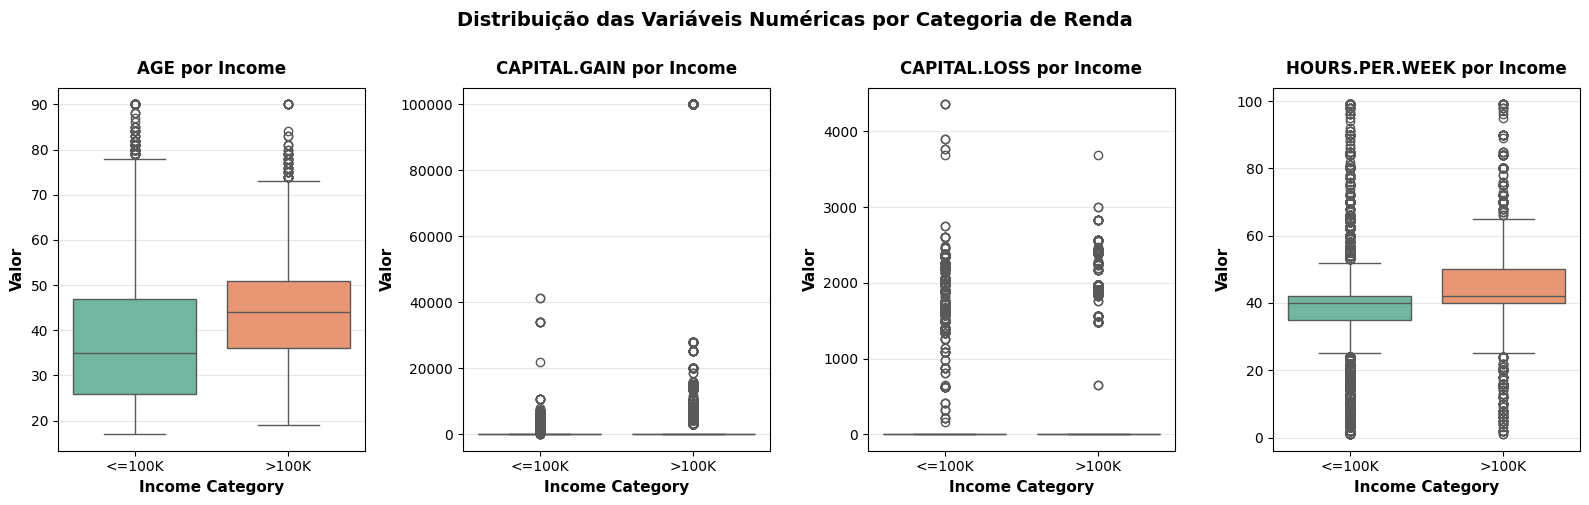

In [209]:
# Boxplots das numéricas por target
colunas_numericas = ["age", "capital.gain", "capital.loss", "hours.per.week"]

n_cols = len(colunas_numericas)

fig, axes = plt.subplots(1, n_cols, figsize=(16, 5))

# Se houver apenas 1 coluna, axes não será um array
if n_cols == 1:
    axes = [axes]

for ax, col in zip(axes, colunas_numericas):
    sns.boxplot(x='income', y=col, data=df, hue='income', ax=ax, palette='Set2', legend=False)
    ax.set_title(f'{col.upper()} por Income', fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Income Category', fontsize=11, fontweight='bold')
    ax.set_ylabel('Valor', fontsize=11, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Distribuição das Variáveis Numéricas por Categoria de Renda', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

Correlação e Heatmap

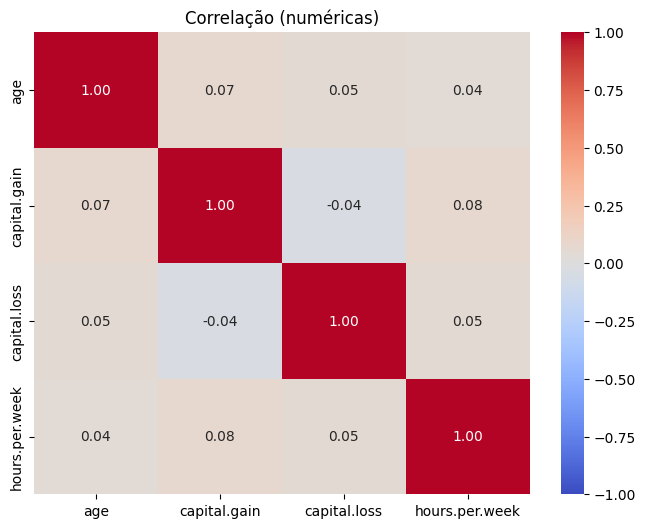

In [210]:
# Selecionar colunas numéricas
colunas_numericas = ["age", "capital.gain", "capital.loss", "hours.per.week"]

plt.figure(figsize=(8, 6))
sns.heatmap(df[colunas_numericas].corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação (numéricas)')
plt.show()

Composição das Categorias e sua relação com o Target:

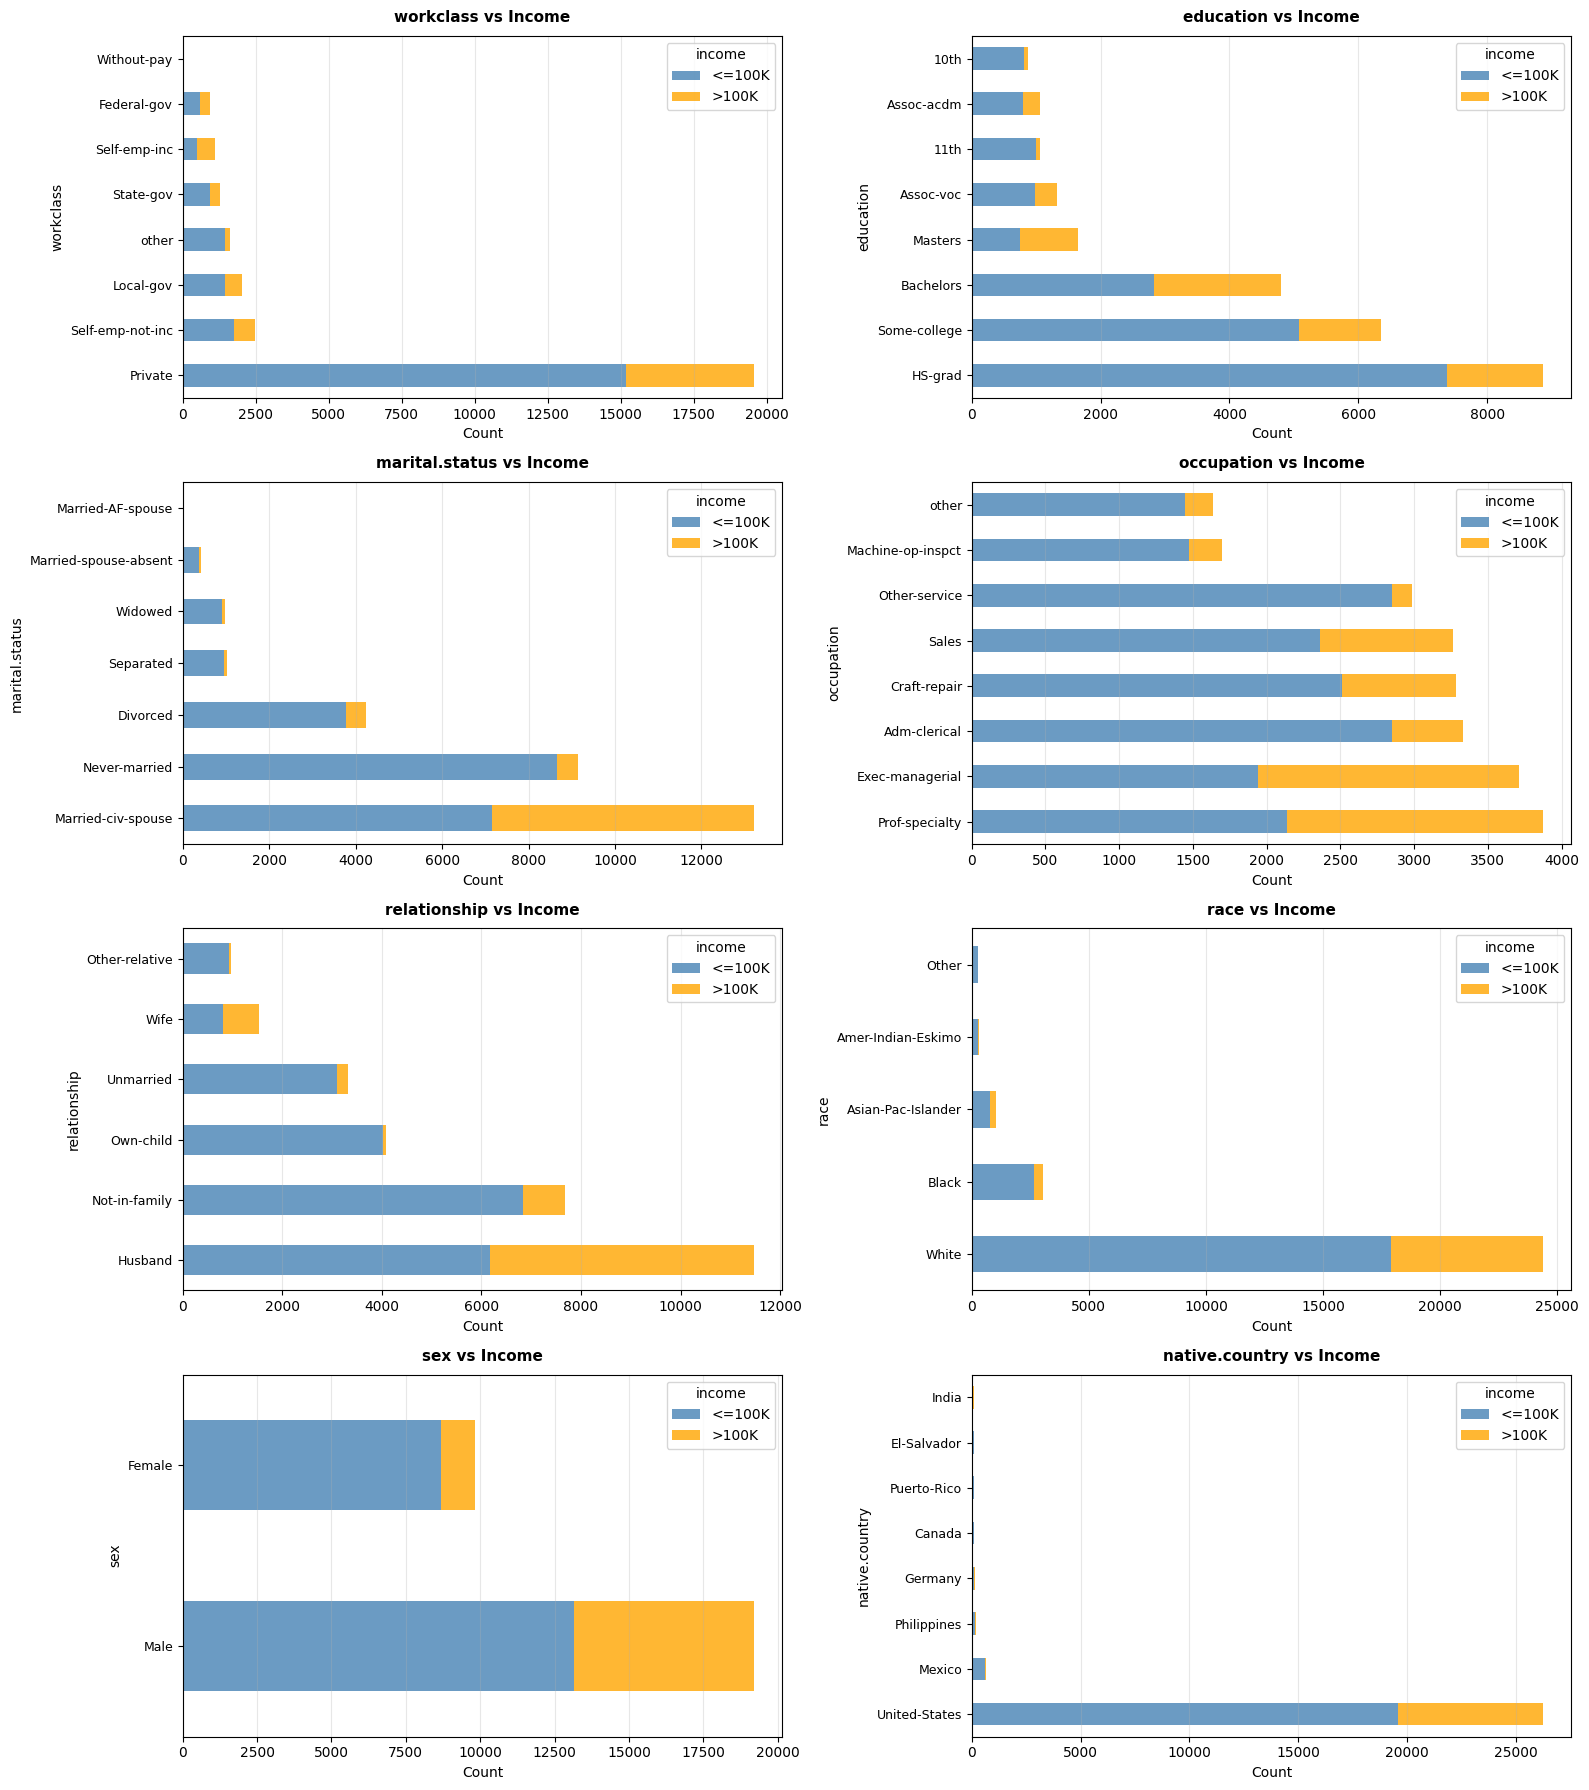

In [211]:
# Lista de colunas categóricas
colunas_categoricas = ['workclass', 'education', 'marital.status', 'occupation',
            'relationship', 'race', 'sex', 'native.country']

fig, axes = plt.subplots(4, 2, figsize=(16, 18))  # Ajuste tamanho

for ax, col in zip(axes.flat, colunas_categoricas):
    if col in df.columns:
        # Agrupar por categoria e income
        counts = df.groupby([col, 'income']).size().unstack(fill_value=0)

        # Selecionar top 8 categorias mais frequentes
        top_categories = df[col].value_counts().head(8).index
        counts = counts.loc[top_categories]

        # Plotar barras empilhadas (stacked)
        counts.plot(kind='barh', stacked=True, ax=ax,
                    color=['steelblue', 'orange'], alpha=0.8)

        ax.set_title(f'{col} vs Income', fontsize=11, fontweight='bold', pad=10)
        ax.set_xlabel('Count', fontsize=10)
        ax.tick_params(axis='y', labelsize=9)
        ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Análise do Target (Distribuição da Renda):

Target counts:
 income
<=100K    21841
>100K      7187
Name: count, dtype: int64

Target percent:
 income
<=100K    75.24
>100K     24.76
Name: proportion, dtype: float64


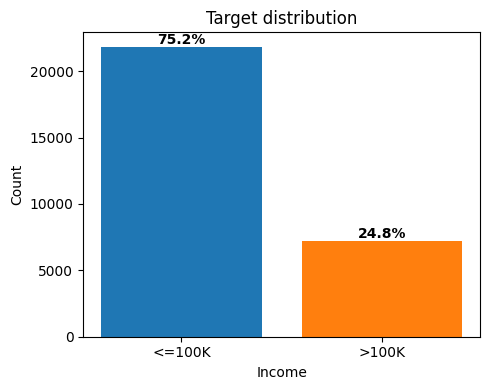

In [212]:
# Balanceamento da target
counts = df['income'].value_counts()
pct = df['income'].value_counts(normalize=True) * 100
print("Target counts:\n", counts)
print("\nTarget percent:\n", pct.round(2))

fig, ax = plt.subplots(figsize=(5, 4))
bars = ax.bar(counts.index, counts.values, color=['#1f77b4', '#ff7f0e'])

# Adicionar rótulos percentuais no topo de cada coluna
for i, (bar, percentage) in enumerate(zip(bars, pct.values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{percentage:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_title('Target distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Income')
plt.tight_layout()
plt.show()

#### Cálculo do VIF (Variance Inflation Factor)

O VIF é uma métrica usada para detectar multicolinearidade — ou seja, quando uma variável explicativa pode ser explicada linearmente pelas outras variáveis, o que atrapalha modelos estatísticos/regressões.

Para cada coluna, calcula o quanto ela é explicada pelas demais.

- VIF ≈ 1 → sem multicolinearidade

- VIF > 5 → possível problema

- VIF > 10 → multicolinearidade severa

In [213]:
# VIF rápido nas numéricas (ajuda decidir remoções)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    X_num = df[num_cols].dropna()
    X_num_const = sm.add_constant(X_num)
    vif_data = pd.DataFrame({
        'feature': X_num.columns,
        'VIF': [variance_inflation_factor(X_num_const.values, i+1) for i in range(len(X_num.columns))]
    }).sort_values('VIF', ascending=False)
    print("\nVIF (numéricas):\n", vif_data.round(2))


VIF (numéricas):
           feature   VIF
1   education.num  1.04
2    capital.gain  1.03
4  hours.per.week  1.03
3    capital.loss  1.01
0             age  1.01


A análise do VIF nos mostra que todas as variáveis numéricas são independentes e que não há necessidade de remoção.

### Tratamento, Conversão e Criação de Features

##### Convertendo Classificação Textual para Numérica

A feature <b>education</b> é categórica e no dataset ela vem tanto em formato object quanto em int64 (<b>education.num</b>), ambas trazendo a mesma informação em formatos diferentes.
Podemos fazer o mesmo com as demais colunas textuais categóricas.
Existe uma biblioteca que faz isso de forma automática chamada <b>LabelEncoder</b>.

O mapeamento do LabelEncoder não muda aleatoriamente a cada execução. Ele segue uma regra fixa:

    - As classes são ordenadas em ordem alfabética (lexicográfica).

    - Cada categoria recebe um número inteiro começando em 0.

Preferimos fazer este processo de forma manual, assim garantimos mais transparencia e facilita nossa visualização e futuras consultas. Caso haja nova categoria, basta acrescentar no mapeamento abaixo.

In [214]:
# Definir mapeamentos fixos
mappings = {
    "workclass": {
        "Federal-gov": 0, "Local-gov": 1, "Never-worked": 2, "Private": 3,
        "Self-emp-inc": 4, "Self-emp-not-inc": 5, "State-gov": 6,
        "Without-pay": 7, "other": 8
    },
    "marital.status": {
        "Divorced": 0, "Married-AF-spouse": 1, "Married-civ-spouse": 2,
        "Married-spouse-absent": 3, "Never-married": 4,
        "Separated": 5, "Widowed": 6
    },
    "occupation": {
        "Adm-clerical": 0, "Armed-Forces": 1, "Craft-repair": 2,
        "Exec-managerial": 3, "Farming-fishing": 4, "Handlers-cleaners": 5,
        "Machine-op-inspct": 6, "Other-service": 7, "Priv-house-serv": 8,
        "Prof-specialty": 9, "Protective-serv": 10, "Sales": 11,
        "Tech-support": 12, "Transport-moving": 13, "other": 14
    },
    "relationship": {
        "Husband": 0, "Not-in-family": 1, "Other-relative": 2,
        "Own-child": 3, "Unmarried": 4, "Wife": 5
    },
    "race": {
        "Amer-Indian-Eskimo": 0, "Asian-Pac-Islander": 1,
        "Black": 2, "Other": 3, "White": 4
    },
    "sex": {
        "Female": 0, "Male": 1
    },
    "native.country": {
        "Cambodia": 0, "Canada": 1, "China": 2, "Columbia": 3, "Cuba": 4,
        "Dominican-Republic": 5, "Ecuador": 6, "El-Salvador": 7, "England": 8,
        "France": 9, "Germany": 10, "Greece": 11, "Guatemala": 12, "Haiti": 13,
        "Holand-Netherlands": 14, "Honduras": 15, "Hong": 16, "Hungary": 17,
        "India": 18, "Iran": 19, "Ireland": 20, "Italy": 21, "Jamaica": 22,
        "Japan": 23, "Laos": 24, "Mexico": 25, "Nicaragua": 26,
        "Outlying-US(Guam-USVI-etc)": 27, "Peru": 28, "Philippines": 29,
        "Poland": 30, "Portugal": 31, "Puerto-Rico": 32, "Scotland": 33,
        "South": 34, "Taiwan": 35, "Thailand": 36, "Trinadad&Tobago": 37,
        "United-States": 38, "Vietnam": 39, "Yugoslavia": 40, "other": 41
    },
    "income": {
        "<=100K": 0, ">100K": 1
    }
}

# Função para aplicar os mapeamentos
def apply_mappings(df, mappings):
    for col, mapping in mappings.items():
        df[col + ".num"] = df[col].map(mapping)
    return df

# Exemplo de uso
df = apply_mappings(df, mappings)

In [215]:
# Tabela de correspondência entre native.country e native.country.num
df[["native.country", "native.country.num"]].drop_duplicates().sort_values("native.country.num")


,native.country,native.country.num
921,Cambodia,0
157,Canada,1
63,China,2
1258,Columbia,3
726,Cuba,4
1004,Dominican-Republic,5
2299,Ecuador,6
1117,El-Salvador,7
287,England,8
2368,France,9


#### Normalizando Escala das Features Capital.Gain e Capital.Loss

In [216]:

# Selecionar colunas que deseja normalizar
colunas_capital = ["capital.gain", "capital.loss"]

# Instanciar o scaler
scaler = StandardScaler()

# Aplicar o scaler e criar novas colunas com sufixo ".num"
df[[col + ".num" for col in colunas_capital]] = scaler.fit_transform(df[colunas_capital])


#### Testando as Features Categóricas Numéricas usando do PCA (Análise de Componentes Principais)

In [217]:
# Selecionar colunas numéricas
colunas_numericas = ['age', 'education.num', 'workclass.num', 'marital.status.num', 'occupation.num', 'relationship.num', 'race.num', 'sex.num', 'native.country.num', 'capital.gain.num', 'capital.loss.num', 'hours.per.week']
df_num = df[colunas_numericas]
df_num

,age,education.num,workclass.num,marital.status.num,occupation.num,relationship.num,race.num,sex.num,native.country.num,capital.gain.num,capital.loss.num,hours.per.week
0,90,9,8,6,14,1,4,0,38,-0.154181,10.032713,40
1,82,9,3,6,3,1,4,0,38,-0.154181,10.032713,18
2,66,10,8,6,14,4,2,0,38,-0.154181,10.032713,40
3,54,4,3,0,6,4,4,0,38,-0.154181,8.958435,40
4,41,10,3,5,9,3,4,0,38,-0.154181,8.958435,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,14,3,4,12,1,1,1,35,-0.154181,-0.229469,11
32555,53,14,3,2,3,0,4,1,38,-0.154181,-0.229469,40
32556,22,10,3,4,10,1,4,1,38,-0.154181,-0.229469,40
32557,27,12,3,2,12,5,4,0,38,-0.154181,-0.229469,38


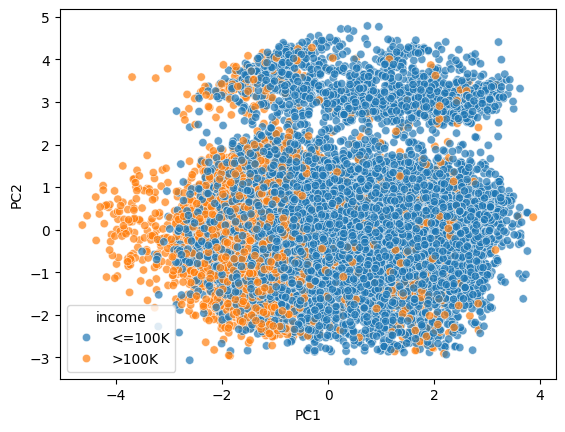

In [218]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame({
    "PC1": pca_result[:, 0],
    "PC2": pca_result[:, 1],
    "income": df["income"]
})
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="income", alpha=0.7)
plt.show()

#### Criando novas Features

O PCA nos mostrou que as features atuais aparentemente são suficientes para nos entregar modelos com bons resultados. O gráfico nos mostra uma clara segmentação dos targets.

No entanto, vamos criar novas Features e verificar se o uso delas trarão alguma melhoria.

Iremos criar as 4 features abaixo:

- <b>capital.result.num</b>: Será o resultado da diferença entre capital.gain e capital.loss, em outras palavras, será o valor liquido de ganho de capital anual.

- <b>education.group.num</b>: Será uma redução na quantidade de níveis de educação de 17 categorias para 3 categorias conforme a seguir:

| Categoria Original                                     | education.num | Novo Grupo       | Novo Grupo Num |
|--------------------------------------------------------|---------------|------------------|----------------|
| Preschool até 12th                                     | 1–8           | ≤ High School    |        1       |
| HS-grad, Some-college, Assoc-voc, Assoc-acdm, Bachelors| 9–13          | Undergraduate    |        2       |
| Masters, Prof-school, Doctorate                        | 14–16         | Postgraduate     |        3       |


- <b>workclass.group.num</b>: Será redução na quantidade de tipos de vínculo empregatício de 9 para 3, conforme a seguir:

| Categoria Original                          | workclass.num | Novo Grupo (workclass_group) | Grupo Nº |
|---------------------------------------------|---------------|------------------------------|----------|
| Federal-gov, Local-gov, State-gov, Private  | 0, 1, 3, 6    | Employed                     | 1        |
| Self-emp-inc, Self-emp-not-inc              | 4, 5          | Self-employed                | 2        |
| Never-worked, Without-pay, other            | 2, 7, 8       | Not Working/Other            | 3        |

- <b>age.group.num</b>: Criar faixa etária '18-30', '31-45', '46-60', '60+'

Criando Capital.Result.Num

In [219]:
df['capital.result'] = df['capital.gain'] - df['capital.loss']

# Instanciar o scaler
scaler = StandardScaler()

# Aplicar o scaler e criar novas colunas com sufixo ".num"
df['capital.result.num'] = scaler.fit_transform(df[['capital.result']])

Criando age.group.num

In [220]:
# Criar faixas de idade
df['age.group'] = pd.cut(df['age'], bins=[16, 30, 45, 60, 100],
                         labels=['17-30', '31-45', '46-60', '60+'])

def segmenta_idade(x):
    # Grupo 1: Jovens adultos
    if x == '17-30':
        return 1
    # Grupo 2: Adultos em fase intermediária
    elif x == '31-45':
        return 2
    # Grupo 3: Adultos maduros
    elif x == '46-60':
        return 3
    # Grupo 4: Idosos
    else:
        return 4

# Aplicando ao dataframe
df['age.group.num'] = df['age.group'].apply(segmenta_idade)

Criando education.group.num e workclass.group.num

In [221]:
def simplifica_num_escolaridade(x):
    # Grupo 1: até ensino médio incompleto
    if x in ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad']:
        return 1
    # Grupo 2: graduação incompleta ou completa
    elif x in ['Some-college','Assoc-voc','Assoc-acdm','Bachelors']:
        return 2
    # Grupo 3: pós-graduação
    else:  # Masters, Prof-school, Doctorate
        return 3

df['education.group.num'] = df['education'].apply(simplifica_num_escolaridade)


def simplifica_num_vinculo_empregaticio(x):
    # Grupo 1: empregados (governo ou setor privado)
    if x in ['Federal-gov','Local-gov','State-gov','Private']:
        return 1
    # Grupo 2: autônomos
    elif x in ['Self-emp-inc','Self-emp-not-inc']:
        return 2
    # Grupo 3: não empregados ou outros
    else:  # Never-worked, Without-pay, other
        return 3

df['workclass.group.num'] = df['workclass'].apply(simplifica_num_vinculo_empregaticio)

In [222]:
colunas_numericas_new = ['marital.status.num', 'occupation.num', 'relationship.num', 'race.num',
                  'sex.num', 'native.country.num', 'capital.result.num', 'age.group.num',
                  'education.group.num', 'workclass.group.num'
                ]

df_num_new = df[colunas_numericas_new]
df_num_new.isna().sum()

,0
marital.status.num,0
occupation.num,0
relationship.num,0
race.num,0
sex.num,0
native.country.num,0
capital.result.num,0
age.group.num,0
education.group.num,0
workclass.group.num,0


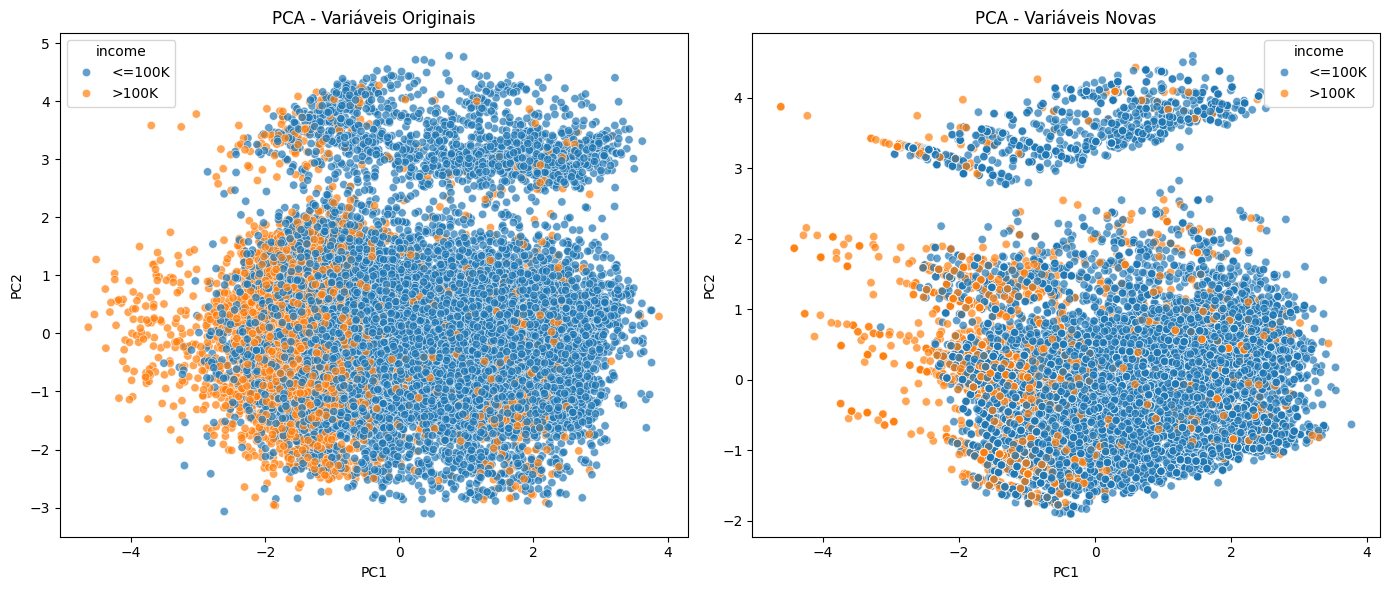

In [ ]:

# --- PCA com variáveis originais ---
colunas_numericas_original = [
    'age', 'education.num', 'workclass.num', 'marital.status.num', 'occupation.num',
    'relationship.num', 'race.num', 'sex.num', 'native.country.num',
    'capital.gain.num', 'capital.loss.num', 'hours.per.week'
]

df_num_original = df[colunas_numericas_original]

scaler_original = StandardScaler()
scaled_data_original = scaler_original.fit_transform(df_num_original)

pca_original = PCA(n_components=2)
pca_result_original = pca_original.fit_transform(scaled_data_original)

df_pca_original = pd.DataFrame({
    "PC1": pca_result_original[:, 0],
    "PC2": pca_result_original[:, 1],
    "income": df["income"]
})

# --- PCA com variáveis novas ---
colunas_numericas_new = ['marital.status.num', 'occupation.num', 'relationship.num', 'race.num',
                  'sex.num', 'native.country.num', 'capital.result.num', 'age.group.num',
                  'education.group.num', 'workclass.group.num', 'hours.per.week'
                ]

df_num_new = df[colunas_numericas_new]

scaler_new = StandardScaler()
scaled_data_new = scaler_new.fit_transform(df_num_new)

pca_new = PCA(n_components=2)
pca_result_new = pca_new.fit_transform(scaled_data_new)

df_pca_new = pd.DataFrame({
    "PC1": pca_result_new[:, 0],
    "PC2": pca_result_new[:, 1],
    "income": df["income"]
})

# --- Plotar lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_pca_original, x="PC1", y="PC2", hue="income", alpha=0.7, ax=axes[0])
axes[0].set_title("PCA - Variáveis Originais")

sns.scatterplot(data=df_pca_new, x="PC1", y="PC2", hue="income", alpha=0.7, ax=axes[1])
axes[1].set_title("PCA - Variáveis Novas")

plt.tight_layout()
plt.show()

As novas features trouxeram mais informação ao PCA:

1. Os clusters ficaram muito mais separados verticalmente.

2. O cluster superior ficou mais compacto e mais estreito horizontalmente e o cluster inferior ficou mais concentrado e menos espalhado.

3. A distribuição horizontal (PC1) ficou mais assimétrica. A classe >50K (laranja) está muito mais deslocada para a direita. Isso sugere que uma ou mais das novas features carregam informação que separa parcialmente essa classe.

4. A separação entre as classes ficou ligeiramente mais perceptível. Os pontos laranja estão menos misturados no cluster central.


#### Análise da Matriz de Correlação e Multicolinearidade

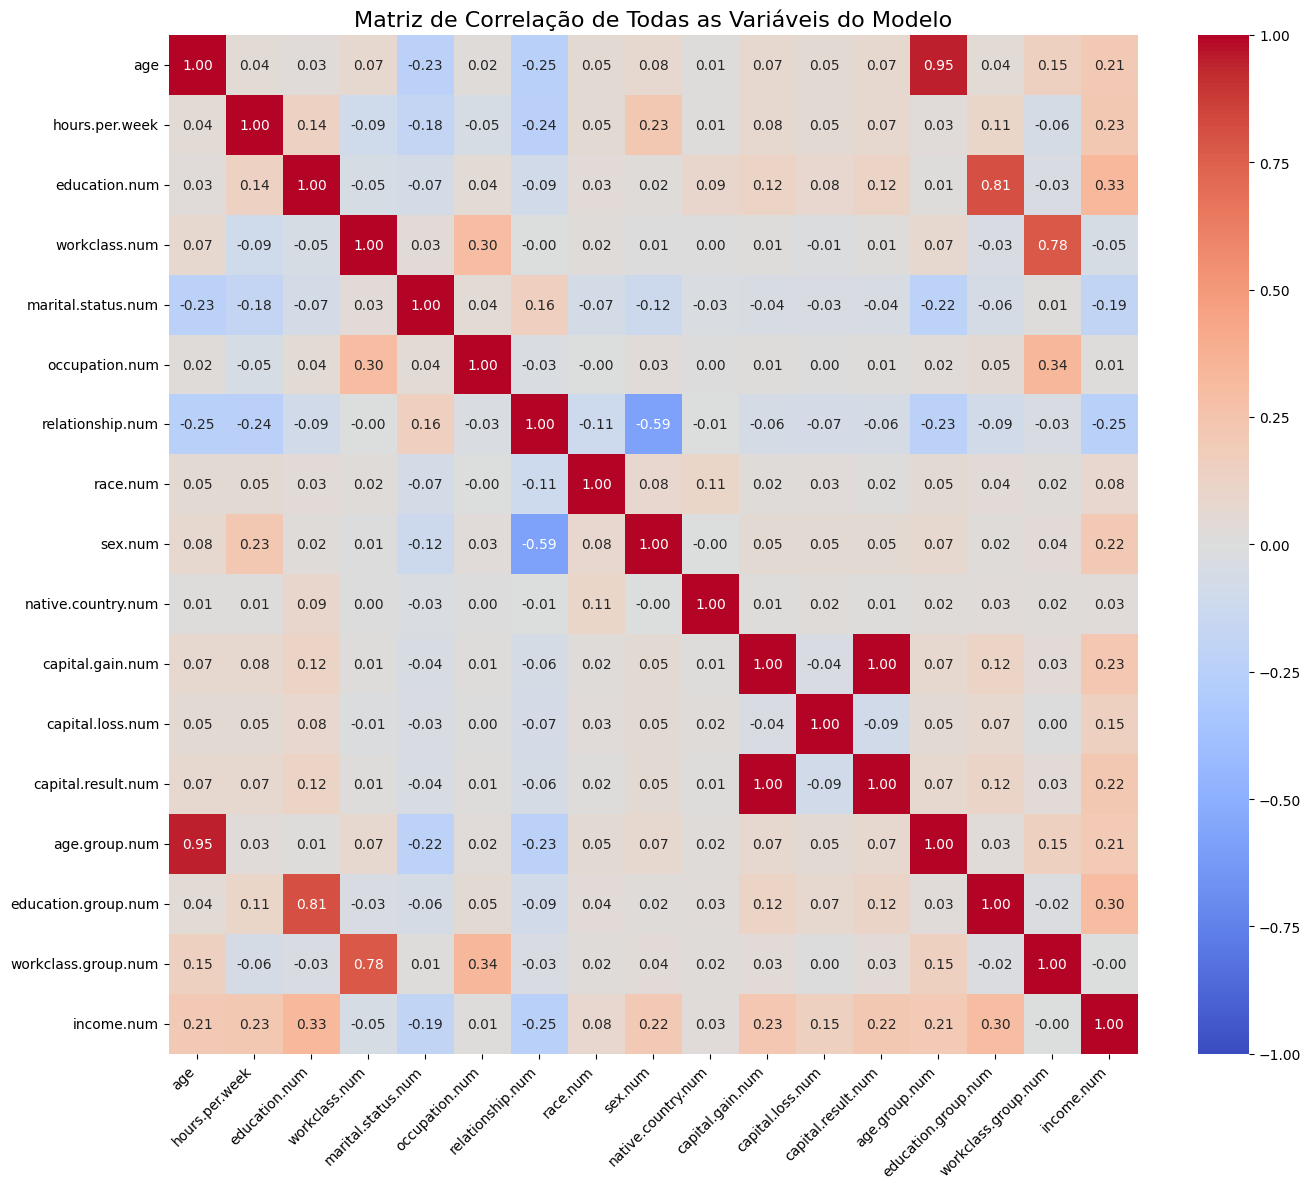

In [226]:
colunas_para_correlacao = [
    'age', 'hours.per.week',
    'education.num', 'workclass.num', 'marital.status.num', 'occupation.num',
    'relationship.num', 'race.num', 'sex.num', 'native.country.num',
    'capital.gain.num', 'capital.loss.num',
    'capital.result.num', 'age.group.num', 'education.group.num', 'workclass.group.num',
    'income.num'
]

# Selecionar as colunas do DataFrame
df_correlacao = df[colunas_para_correlacao]

# Calcular a matriz de correlação
matriz_correlacao = df_correlacao.corr()

# Plotar o heatmap
plt.figure(figsize=(14, 12)) # Adjusted figure size for more variables
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Todas as Variáveis do Modelo', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Ao observar a matriz de correlação, procuramos por:

*   **Correlações Fortes com `income.num` (Variável Alvo):** Variáveis com coeficientes de correlação mais altos (próximos de 1 ou -1) com `income.num` são as mais importantes para prever a renda. Por exemplo, `education.group.num`, `age.group.num`, `capital.result.num` e `marital.status.num` mostram as correlações mais fortes.

*   **Multicolinearidade (Correlação entre Variáveis Preditivas):** Se duas variáveis preditivas (não a `income.num`) têm uma correlação muito alta entre si (ex: > 0.7 ou < -0.7), elas podem ser consideradas autocorrelacionadas ou multicolineares. Isso significa que elas fornecem informações redundantes ao modelo e uma delas pode ser removida para simplificar sem perda significativa de performance. Por exemplo, `education.num` e `education.group.num` são altamente correlacionadas, o que é esperado, pois uma é uma versão agrupada da outra.

    - No nosso caso, as novas features criadas (`education.group.num`, `workclass.group.num`, `age.group.num`, `capital.result.num`) mostram, como esperado, forte correlação com suas contrapartes originais ou com as variáveis que as compõem. Por exemplo, `capital.result.num` tem correlação alta com `capital.gain.num` e `capital.loss.num`, e `education.group.num` com `education.num`. Isso indica que essas novas features estão encapsulando as informações de suas bases de forma eficiente.

    - Para a modelagem, podemos decidir usar apenas as novas features agrupadas, se elas demonstrarem maior poder preditivo ou interpretabilidade, ou as originais, evitando incluir ambas se houver risco de multicolinearidade excessiva que afete a estabilidade do modelo.

### Variáveis sensíveis


No contexto deste estudo, é importante destacar que algumas variáveis utilizadas no dataset – em especial raça (race), sexo (sex) e país de origem (native_country) – são consideradas atributos sensíveis, pois se relacionam diretamente a características protegidas por legislações antidiscriminatórias e normas de direitos humanos. A utilização explícita desses campos em modelos de classificação voltados a segmentação de clientes, ainda que com finalidade comercial, aumenta o risco de que o algoritmo aprenda e reproduza desigualdades históricas, gerando decisões com potencial viés discriminatório. Em termos regulatórios, esse tema vem recebendo atenção crescente: na União Europeia, o AI Act e normas complementares de proteção de dados (como o GDPR) estabelecem salvaguardas rigorosas para o uso de dados sensíveis e exigem avaliação de impacto e mitigação de viés em sistemas de IA de “alto risco”; nos Estados Unidos, órgãos como a FTC, CFPB e EEOC têm reiterado que a discriminação algorítmica é tão ilícita quanto a discriminação direta, inclusive em crédito, emprego e serviços financeiros; e no Brasil, a LGPD, aliada a orientações de reguladores do sistema financeiro (como Banco Central, CVM e SUSEP), reforça o princípio de não discriminação e a necessidade de transparência em decisões automatizadas. Diante desse cenário, e alinhado às boas práticas de governança algorítmica, opta-se pela remoção de race, sex e native_country do conjunto de variáveis utilizadas para fins preditivos, de modo a reduzir o risco de que o modelo baseie suas previsões em critérios potencialmente discriminatórios, mantendo o foco em variáveis socioeconômicas e de perfil que sejam mais aceitáveis do ponto de vista ético, regulatório e de reputação institucional.

A análise da matriz de correlação indica que a remoção das variáveis sensíveis (race.num, sex.num e native.country.num) tende a ter impacto limitado sobre o poder preditivo global do modelo. Observa-se que race.num e native.country.num apresentam correlações muito baixas com a variável alvo income.num (da ordem de 0,02 a 0,08), sugerindo que, pelo menos de forma linear, contribuem pouco para distinguir clientes de alta renda. Já sex.num apresenta correlação um pouco maior (cerca de 0,22), mas ainda inferior à de variáveis claramente mais informativas, como education.num (≈0,33), education.group.num (≈0,30), capital.gain.num e capital.result.num (≈0,23) e até mesmo hours.per.week (≈0,23). Além disso, parte da informação capturada por sexo e país tende a estar indiretamente refletida em outras variáveis socioeconômicas (escolaridade, tipo de ocupação, horas trabalhadas), o que reduz ainda mais a perda efetiva de performance ao excluí-las. Dessa forma, a expectativa é que a retirada desses atributos sensíveis possa gerar, na prática, apenas uma redução marginal em métricas como AUC ou F1-Score, em troca de um ganho relevante em termos de conformidade regulatória, ética e reputacional, mantendo o modelo baseado principalmente em fatores de perfil econômico e laboral mais alinhados ao objetivo de negócio.

## 2.4 Modelagem e Avaliação

Nesta seção, utilizaremos uma variedade de algoritmos de Machine Learning para construir e testar modelos preditivos, buscando identificar o que melhor se adapta ao nosso problema de classificação. Os modelos que serão explorados incluem:

*   **LogisticRegression (Regressão Logística)**: Um modelo linear simples, mas eficaz, ideal para servir como baseline e oferecer interpretabilidade.
*   **KNeighborsClassifier (K-Vizinhos)**: Um algoritmo não-paramétrico baseado em proximidade, que classifica pontos de dados com base na maioria dos votos de seus vizinhos mais próximos.
*   **DecisionTreeClassifier (Árvore de Decisão)**: Um modelo intuitivo que usa uma estrutura em forma de árvore para tomar decisões de classificação, facilitando a visualização das regras.
*   **RandomForestClassifier (Floresta Aleatória)**: Um método de ensemble que constrói múltiplas árvores de decisão e combina suas previsões para melhorar a acurácia e reduzir o overfitting.
*   **GradientBoostingClassifier (Gradient Boosting)**: Outro poderoso método de ensemble que constrói árvores sequencialmente, onde cada nova árvore corrige os erros das árvores anteriores, resultando em modelos de alta performance.
*   **SVC (Máquinas de Vetor de Suporte - Support Vector Classifier)**: Um algoritmo que busca o hiperplano ideal para separar as classes, conhecido por sua robustez em espaços de alta dimensão e datasets complexos.

Para cada modelo, aplicaremos o GridSearchCV para encontrar e otimizar os melhores hiperparâmetros, garantindo a máxima performance.

Os desempenhos dos modelos serão comparados ao final.

OBS:. Nenhum dos modelos contém as variáveis sensíveis (race, sex, native_country)

### Modelo: Regressão Logística - Variáveis originais

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Melhores parâmetros encontrados: {'C': 0.1, 'penalty': 'l1'}

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      6553
           1       0.73      0.44      0.54      2156

    accuracy                           0.82      8709
   macro avg       0.78      0.69      0.72      8709
weighted avg       0.81      0.82      0.80      8709



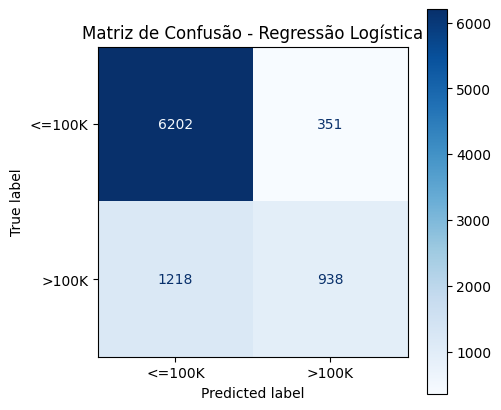

In [227]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression  # Importar LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

colunas_numericas_original = ['age', 'education.num', 'workclass.num',
                              'marital.status.num', 'occupation.num',
                              'relationship.num', 'capital.gain.num',
                              'capital.loss.num', 'hours.per.week',
                              'income.num'
]

df_num_original = df[colunas_numericas_original]

# Definir variáveis independentes (X) e alvo (y)
X = df_num_original.drop('income.num', axis=1)   # 'income' é a coluna alvo (>100K ou <=100K)
y = df_num_original['income.num']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir modelo base Logistic Regression
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=200) # Inicializar o modelo Logistic Regression

# Definir grade de parâmetros para busca para Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Força de regularização inversa
    'penalty': ['l1', 'l2']  # Tipo de regularização
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg_model, # Usar o modelo Logistic Regression
    param_grid=param_grid,
    cv=2,                # validação cruzada com 5 folds
    n_jobs=-1,           # usar todos os núcleos
    verbose=2            # mostrar progresso
)

# Treinar com busca em grade
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model_lr_original = grid_search.best_estimator_
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Fazer previsões com o melhor modelo
y_pred = best_model_lr_original.predict(X_test)

# Relatório detalhado
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calcular e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=100K', '>100K'])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matriz de Confusão - Regressão Logística")
plt.grid(False)
plt.show()

### Modelo: Regressão Logística - Variáveis novas

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Melhores parâmetros encontrados: {'C': 0.1, 'penalty': 'l2'}

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      6553
           1       0.71      0.35      0.47      2156

    accuracy                           0.80      8709
   macro avg       0.77      0.65      0.68      8709
weighted avg       0.79      0.80      0.78      8709



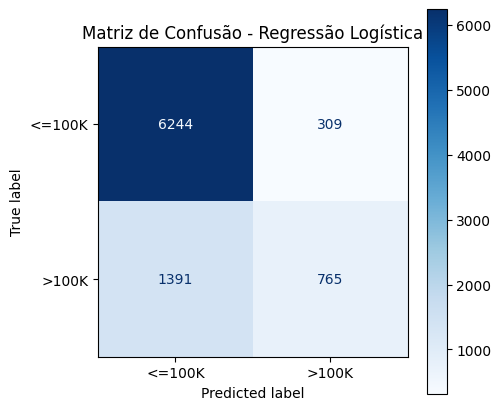

In [228]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression  # Importar LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

colunas_numericas_new = ['marital.status.num', 'occupation.num',
                         'relationship.num', 'capital.result.num',
                         'age.group.num', 'education.group.num',
                         'workclass.group.num', 'hours.per.week',
                         'income.num'
]

df_num_new = df[colunas_numericas_new]

# Definir variáveis independentes (X) e alvo (y)
X = df_num_new.drop('income.num', axis=1)   # 'income' é a coluna alvo (>100K ou <=100K)
y = df_num_new['income.num']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir modelo base Logistic Regression
log_reg_model_new = LogisticRegression(random_state=42, solver='liblinear', max_iter=200) # Inicializar o modelo Logistic Regression

# Definir grade de parâmetros para busca para Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Força de regularização inversa
    'penalty': ['l1', 'l2']  # Tipo de regularização
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg_model_new, # Usar o modelo Logistic Regression
    param_grid=param_grid,
    cv=2,                # validação cruzada com 5 folds
    n_jobs=-1,           # usar todos os núcleos
    verbose=2            # mostrar progresso
)

# Treinar com busca em grade
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model_lr_new = grid_search.best_estimator_
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Fazer previsões com o melhor modelo
y_pred = best_model_lr_new.predict(X_test)

# Relatório detalhado
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calcular e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=100K', '>100K'])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matriz de Confusão - Regressão Logística")
plt.grid(False)
plt.show()

### Modelo: KNN - Variáveis originais

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Melhores parâmetros encontrados: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      6553
           1       0.63      0.55      0.59      2156

    accuracy                           0.81      8709
   macro avg       0.75      0.72      0.73      8709
weighted avg       0.80      0.81      0.80      8709



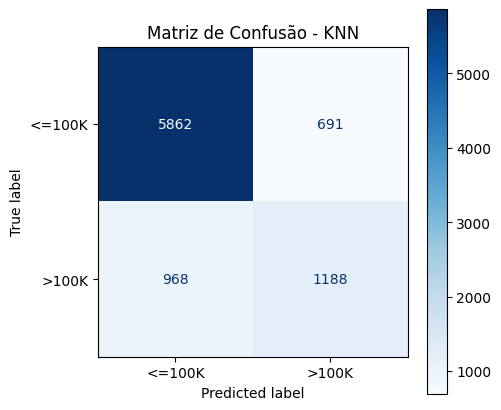

In [229]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  # Importar KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

colunas_numericas_original = ['age', 'education.num', 'workclass.num',
                              'marital.status.num', 'occupation.num',
                              'relationship.num', 'capital.gain.num',
                              'capital.loss.num', 'hours.per.week',
                              'income.num'
]

df_num_original = df[colunas_numericas_original]

# Definir variáveis independentes (X) e alvo (y)
X = df_num_original.drop('income.num', axis=1)   # 'income' é a coluna alvo (>100K ou <=100K)
y = df_num_original['income.num']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir modelo base KNN
knn_model = KNeighborsClassifier()  # Inicializar o modelo KNN

# Definir grade de parâmetros para busca para KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vizinhos
    'weights': ['uniform', 'distance'],  # Peso para os vizinhos
    'metric': ['euclidean', 'manhattan']  # Métrica de distância
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_model, # Usar o modelo KNN
    param_grid=param_grid,
    cv=2,                # validação cruzada com 5 folds
    n_jobs=-1,           # usar todos os núcleos
    verbose=2            # mostrar progresso
)

# Treinar com busca em grade
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model_knn_original = grid_search.best_estimator_
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Fazer previsões com o melhor modelo
y_pred = best_model_knn_original.predict(X_test)

# Relatório detalhado
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calcular e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=100K', '>100K'])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matriz de Confusão - KNN")
plt.grid(False)
plt.show()

### Modelo: KNN - Variáveis novas

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Melhores parâmetros encontrados: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      6553
           1       0.65      0.53      0.58      2156

    accuracy                           0.81      8709
   macro avg       0.75      0.72      0.73      8709
weighted avg       0.80      0.81      0.81      8709



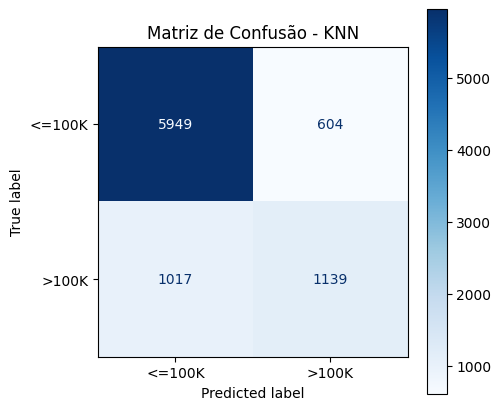

In [230]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  # Importar KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

colunas_numericas_new = ['marital.status.num', 'occupation.num',
                         'relationship.num', 'capital.result.num',
                         'age.group.num', 'education.group.num',
                         'workclass.group.num', 'hours.per.week',
                         'income.num'
]

df_num_new = df[colunas_numericas_new]

# Definir variáveis independentes (X) e alvo (y)
X = df_num_new.drop('income.num', axis=1)   # 'income' é a coluna alvo (>100K ou <=100K)
y = df_num_new['income.num']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir modelo base KNN
knn_model_new = KNeighborsClassifier()  # Inicializar o modelo KNN

# Definir grade de parâmetros para busca para KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vizinhos
    'weights': ['uniform', 'distance'],  # Peso para os vizinhos
    'metric': ['euclidean', 'manhattan']  # Métrica de distância
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_model_new, # Usar o modelo KNN
    param_grid=param_grid,
    cv=2,                # validação cruzada com 5 folds
    n_jobs=-1,           # usar todos os núcleos
    verbose=2            # mostrar progresso
)

# Treinar com busca em grade
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model_knn_new = grid_search.best_estimator_
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Fazer previsões com o melhor modelo
y_pred = best_model_knn_new.predict(X_test)

# Relatório detalhado
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calcular e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=100K', '>100K'])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matriz de Confusão - KNN")
plt.grid(False)
plt.show()

### Modelo: Árvore de Decisão - Variáveis originais


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      6553
           1       0.70      0.65      0.68      2156

    accuracy                           0.85      8709
   macro avg       0.80      0.78      0.79      8709
weighted avg       0.84      0.85      0.84      8709



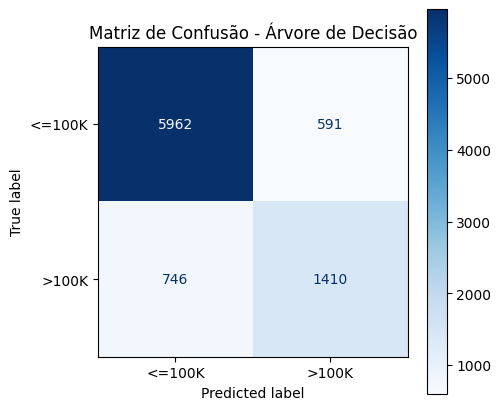

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

colunas_numericas_original = ['age', 'education.num', 'workclass.num',
                              'marital.status.num', 'occupation.num',
                              'relationship.num', 'capital.gain.num',
                              'capital.loss.num', 'hours.per.week',
                              'income.num'
]

df_num_original = df[colunas_numericas_original]

# Definir variáveis independentes (X) e alvo (y)
X = df_num_original.drop('income.num', axis=1)   # 'income' é a coluna alvo (>100K ou <=100K)
y = df_num_original['income.num']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Criar e treinar modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(
    criterion='gini',   # ou 'entropy'
    max_depth=10,       # limitar profundidade para evitar overfitting
    random_state=42
)
dt_model.fit(X_train, y_train)

# Fazer previsões
y_pred = dt_model.predict(X_test)

# Relatório detalhado
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calcular e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=100K', '>100K'])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.grid(False)
plt.show()

### Modelo: Árvore de Decisão - Variáveis novas


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      6553
           1       0.73      0.58      0.65      2156

    accuracy                           0.84      8709
   macro avg       0.80      0.76      0.77      8709
weighted avg       0.84      0.84      0.84      8709



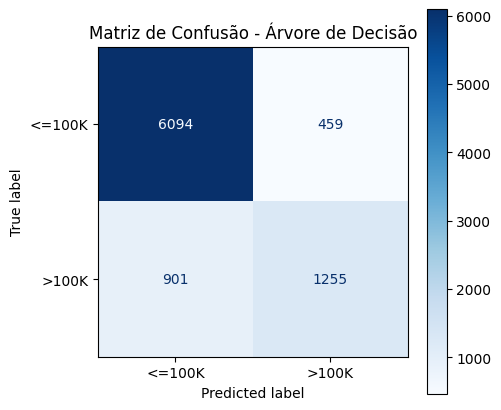

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

colunas_numericas_new = ['marital.status.num', 'occupation.num',
                         'relationship.num', 'capital.result.num',
                         'age.group.num', 'education.group.num',
                         'workclass.group.num', 'hours.per.week',
                         'income.num'
]

df_num_new = df[colunas_numericas_new]

# Definir variáveis independentes (X) e alvo (y)
X = df_num_new.drop('income.num', axis=1)   # 'income' é a coluna alvo (>100K ou <=100K)
y = df_num_new['income.num']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Criar e treinar modelo de Árvore de Decisão
dt_model_new = DecisionTreeClassifier(
    criterion='gini',   # ou 'entropy'
    max_depth=10,       # limitar profundidade para evitar overfitting
    random_state=42
)
dt_model_new.fit(X_train, y_train)

# Fazer previsões
y_pred = dt_model_new.predict(X_test)

# Relatório detalhado
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calcular e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=100K', '>100K'])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.grid(False)
plt.show()

### Modelo: Floresta Aleatória - Variáveis originais

Fitting 2 folds for each of 32 candidates, totalling 64 fits
Melhores parâmetros encontrados: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6553
           1       0.79      0.56      0.65      2156

    accuracy                           0.85      8709
   macro avg       0.83      0.75      0.78      8709
weighted avg       0.85      0.85      0.84      8709



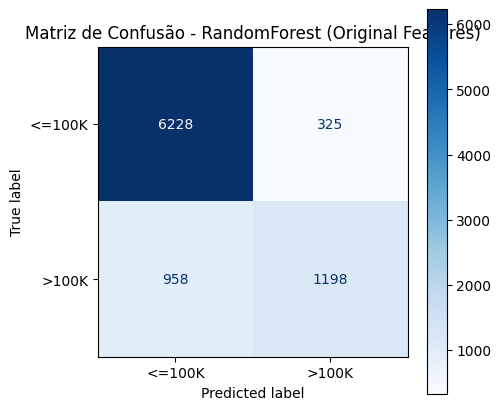

In [233]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Seleção das colunas numéricas
colunas_numericas_original = ['age', 'education.num', 'workclass.num',
                              'marital.status.num', 'occupation.num',
                              'relationship.num', 'capital.gain.num',
                              'capital.loss.num', 'hours.per.week',
                              'income.num'
]

df_num_original = df[colunas_numericas_original]

# Definir variáveis independentes (X) e alvo (y)
X = df_num_original.drop('income.num', axis=1)
y = df_num_original['income.num']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir modelo base
rf_model = RandomForestClassifier(random_state=42)

# Definir grade de parâmetros para busca
param_grid = {
    'n_estimators': [100, 200],       # número de árvores
    'max_depth': [10, 20],      # profundidade máxima
    'min_samples_split': [2, 5],  # mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2],    # mínimo de amostras em uma folha
    'criterion': ['gini', 'entropy']  # função de impureza
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=2,                # validação cruzada com 5 folds
    n_jobs=-1,           # usar todos os núcleos
    verbose=2            # mostrar progresso
)

# Treinar com busca em grade
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model_rf_original = grid_search.best_estimator_
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Fazer previsões com o melhor modelo
y_pred = best_model_rf_original.predict(X_test)

# Relatório detalhado
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calcular e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=100K', '>100K'])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matriz de Confusão - RandomForest (Original Features)")
plt.grid(False)
plt.show()

### Modelo: Floresta Aleatória - Variáveis novas

Fitting 2 folds for each of 32 candidates, totalling 64 fits
Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6553
           1       0.75      0.61      0.67      2156

    accuracy                           0.85      8709
   macro avg       0.82      0.77      0.79      8709
weighted avg       0.85      0.85      0.85      8709



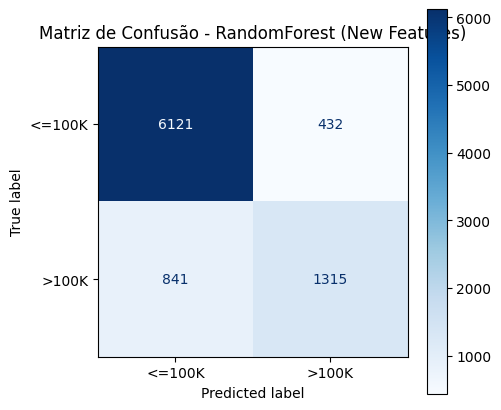

In [234]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

colunas_numericas_new = ['marital.status.num', 'occupation.num',
                         'relationship.num', 'capital.result.num',
                         'age.group.num', 'education.group.num',
                         'workclass.group.num', 'hours.per.week',
                         'income.num'
]

df_num_new = df[colunas_numericas_new]

# Definir variáveis independentes (X) e alvo (y)
X = df_num_new.drop('income.num', axis=1)   # 'income' é a coluna alvo (>100K ou <=100K)
y = df_num_new['income.num']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir modelo base
rf_model_new = RandomForestClassifier(random_state=42)

# Definir grade de parâmetros para busca
param_grid = {
    'n_estimators': [100, 200],       # número de árvores
    'max_depth': [10, 20],      # profundidade máxima
    'min_samples_split': [2, 5],  # mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2],    # mínimo de amostras em uma folha
    'criterion': ['gini', 'entropy']  # função de impureza
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=2,                # validação cruzada com 5 folds
    n_jobs=-1,           # usar todos os núcleos
    verbose=2            # mostrar progresso
)

# Treinar com busca em grade
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model_rf_new = grid_search.best_estimator_
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Fazer previsões com o melhor modelo
y_pred = best_model_rf_new.predict(X_test)

# Relatório detalhado
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Calcular e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=100K', '>100K'])
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matriz de Confusão - RandomForest (New Features)")
plt.grid(False)
plt.show()

Quando olhamos para os resultados destes modelos, fica evidente que não existe “o melhor” em tudo: cada um entrega uma combinação diferente de volume de clientes de alta renda encontrados, qualidade desses leads e custo computacional.

**Regressão Logistica: Poucos clientes de alta renda, mas com Boa “Limpeza”**

A versão original da Regressão Logística acertou 6.202 clientes de alta renda (VP) e errou 938 (FN), ou seja, deixou passar quase mil clientes que de fato são de alta renda. Em compensação, manteve os falsos positivos relativamente baixos (351), o que significa uma base mais “limpa”: quando ela diz que alguém é alta renda, a chance de estar certa é razoável. A versão com variáveis novas não melhorou o quadro de forma significativa: 6.244 VP (42 a mais) e 765 FN (uma redução de 173 clientes de alta renda perdidos), mas à custa de mais mudanças no balanço geral. Mesmo com ROC-AUC razoável (0,85 no original), a Regressão Logística mostra uma limitação clara: captura pouco da não-linearidade do perfil de alta renda, deixando muitas oportunidades na mesa.

**KNN: Mais Agressivo, mas Ainda Aquém**

O KNN original encontrou 5.862 clientes de alta renda (VP), perdendo 1.188 (FN), e cometendo 691 falsos positivos. Ou seja: ele tenta ser mais agressivo que a Regressão Logística, mas ainda erra bastante dos dois lados. A versão com variáveis novas melhora ligeiramente o equilíbrio: 5.949 VP (87 a mais), 1.139 FN (49 clientes de alta renda a mais corretamente identificados) e 604 FP (menos abordagens erradas). O problema é o custo: ~45,6 segundos na versão original e 22,37s na nova, para uma performance global (F1 em torno de 0,63 → 0,62 e ROC-AUC caindo de ~0,88 para ~0,86) que continua atrás dos modelos de árvore. Em resumo: KNN trabalha muito, gasta tempo e não entrega um ganho competitivo.

**Decision Tree: Simples, Razoavelmente Forte e Muito Barata**

A Decision Tree com variáveis originais encontra 5.962 clientes de alta renda e deixa escapar 1.410 (FN). Ao trocar para as novas variáveis, o modelo passa a encontrar 6.094 clientes de alta renda (132 a mais) e reduz os FN para 1.255 (155 clientes de alta renda a mais corretamente identificados), com uma precision ainda sólida. O tempo de treino continua irrisório (0,04s → 0,05s), e o F1-Score se mantém em torno de 0,68 (original) e 0,63 (novo), com ROC-AUC perto de 0,89. Isso significa que a árvore, apesar de simples, captura bem a lógica de segmentação e é extremamente econômica em processamento. Ela erra mais do que a Random Forest, mas faz isso quase de graça em termos de custo computacional.

**Random Forest: Modelo Forte, mas com Custo de Máquina Elevado**

A Random Forest com variáveis originais é, tecnicamente, o modelo mais robusto desse conjunto: 6.228 clientes de alta renda corretamente classificados (maior VP absoluto), 1.198 perdidos (FN) e apenas 325 falsos positivos. Ou seja, encontra muito cliente de alta renda e erra relativamente pouco dos dois lados. O ROC-AUC de ~0,92 confirma a alta capacidade de discriminação e o F1-Score mostra bom equilíbrio entre precisão e recall. O preço disso? Tempo: cerca de 46 segundos por treino. Na versão com variáveis novas, a Random Forest perde um pouco de performance e passa a 6.121 VP e 1.315 FN, seja, perde 107 clientes de alta renda e aumenta a quantidade de clientes de alta renda ignorados. Além disso, mantém custo computacional elevado. Em termos práticos: a Random Forest original é o “modelo forte”, mas caro; a versão com novas variáveis não justifica a troca.

**Resumo: Dentre estes modelos, qual faria mais sentido para o Banco?**

Se o objetivo do banco é maximizar a captação de clientes de alta renda com base em um modelo tecnicamente confiável, a Random Forest com variáveis originais se destaca como o melhor compromisso entre volume de clientes de alta renda encontrados (maior VP), qualidade dos leads (boa precisão, poucos FP) e robustez estatística (maior ROC-AUC). A Decision Tree aparece como uma alternativa extremamente barata computacionalmente, com desempenho próximo em termos de F1-Score e recall, servindo bem como modelo explicável e leve. Já KNN e Regressão Logística, embora úteis como benchmarks, mostram limitações claras: ou deixam muitos clientes de alta renda de fora (FN altos), ou exigem muito processamento para entregar menos do que as árvores conseguem. Em termos de inteligência de negócios, isso significa que a floresta é a estratégia mais efetiva para transformar o perfil de investidor em ação comercial concreta, enquanto os demais modelos ficam melhor posicionados como apoio comparativo e não como solução de produção.

----

### Gradiente Boosting e SVC



### Preparação do Ambiente e Processamento Final

Nesta etapa, consolidamos o pré-processamento dos dados. Definimos as variáveis preditoras (**X**) e a variável alvo (**y**).
Em seguida, realizamos a divisão entre dados de Treino (para o modelo aprender) e Teste (para validar a performance), além de aplicar a **Padronização (StandardScaler)**.

A padronização é crucial, especialmente para o SVC, pois coloca todas as variáveis (idade, horas trabalhadas, capital) na mesma escala matemática.

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import time
import warnings
warnings.filterwarnings("ignore")

# --- FUNÇÃO AUXILIAR ATUALIZADA (COM TEMPO) ---
def avaliar_modelo(modelo, X_test, y_test, nome_modelo, tempo_treino):
    """Calcula métricas, exibe Matriz de Confusão e retorna dicionário com Tempo."""

    # Predições
    y_pred = modelo.predict(X_test)
    try:
        y_proba = modelo.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    except:
        roc = "N/A"

    # Print do Log
    print(f"=== RESULTADOS: {nome_modelo} ===")
    print(f"⏱️ Tempo de Treino: {tempo_treino:.2f} segundos")
    print(f"Acurácia:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC:   {roc if isinstance(roc, str) else f'{roc:.4f}'}")

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=100K', '>100K'])

    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(cmap='Blues', ax=ax, values_format='d')
    plt.title(f"Matriz: {nome_modelo}")
    plt.grid(False)
    plt.show()

    # Retorna dicionário completo para a tabela final
    return {
        "Modelo": nome_modelo,
        "Acurácia": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc if not isinstance(roc, str) else 0,
        "Tempo (s)": round(tempo_treino, 2)  # <--- NOVA COLUNA
    }

# --- PREPARAÇÃO DOS DADOS (X e y) ---
colunas_features = [
    'age', 'workclass.num', 'education.num', 'marital.status.num',
    'occupation.num', 'relationship.num', 'hours.per.week', 'capital.result'
]
X = df[colunas_features]
y = df['income.num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_final = pd.DataFrame(X_train_scaled, columns=colunas_features)
X_test_final = pd.DataFrame(X_test_scaled, columns=colunas_features)

# Lista para acumular resultados
historico_modelos = []

print("✅ Ambiente preparado e função de log configurada.")

✅ Ambiente preparado e função de log configurada.


### Ajustando modelos anteriores para permitir comparação

=== RESULTADOS: Logistic Regression (Original) ===
⏱️ Tempo de Treino: 0.04 segundos
Acurácia:  0.8060
F1-Score:  0.5171
ROC-AUC:   0.8185


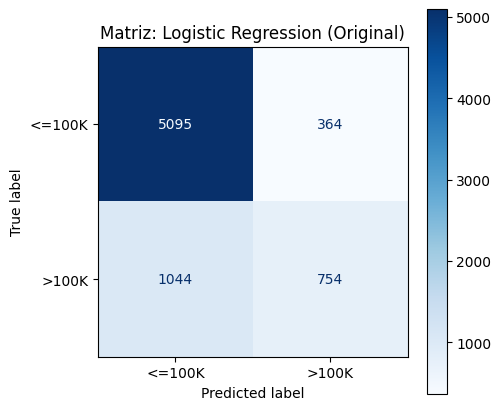

=== RESULTADOS: Logistic Regression (New) ===
⏱️ Tempo de Treino: 0.04 segundos
Acurácia:  0.8061
F1-Score:  0.5180
ROC-AUC:   0.8186


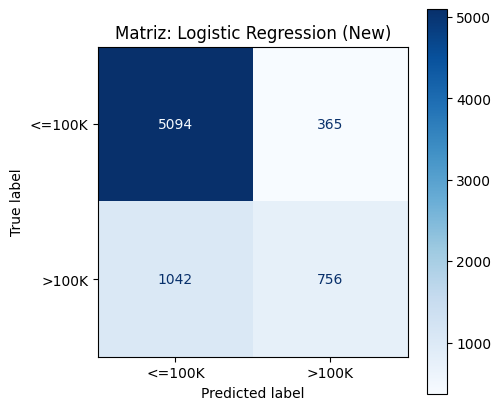

=== RESULTADOS: KNN (Original) ===
⏱️ Tempo de Treino: 0.03 segundos
Acurácia:  0.8267
F1-Score:  0.6249
ROC-AUC:   0.8603


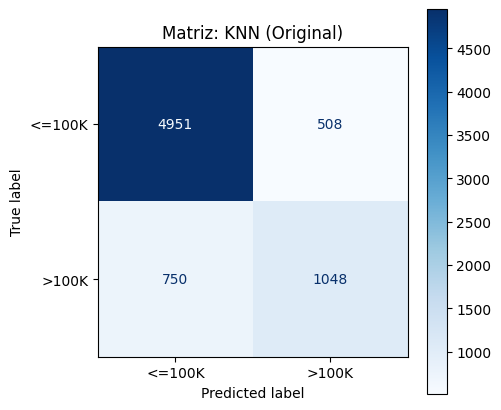

=== RESULTADOS: KNN (New) ===
⏱️ Tempo de Treino: 0.03 segundos
Acurácia:  0.8276
F1-Score:  0.6267
ROC-AUC:   0.8664


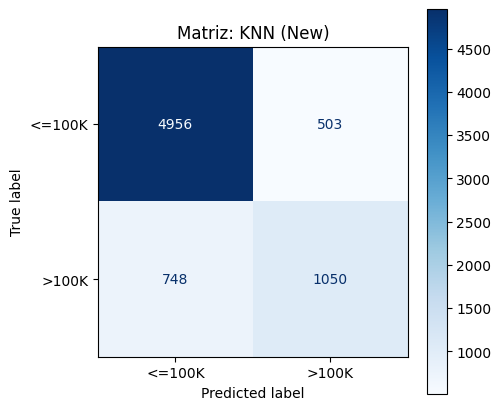

=== RESULTADOS: Decision Tree (Original) ===
⏱️ Tempo de Treino: 0.06 segundos
Acurácia:  0.8439
F1-Score:  0.6651
ROC-AUC:   0.8884


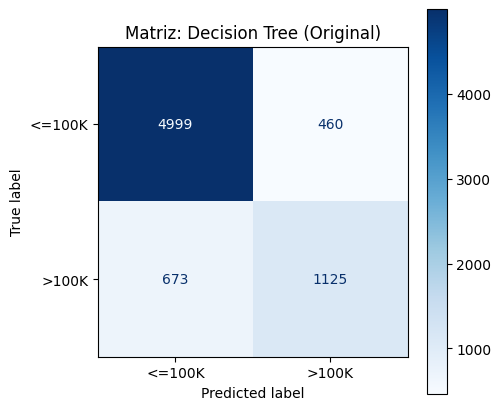

=== RESULTADOS: Decision Tree (New) ===
⏱️ Tempo de Treino: 0.07 segundos
Acurácia:  0.8439
F1-Score:  0.6651
ROC-AUC:   0.8884


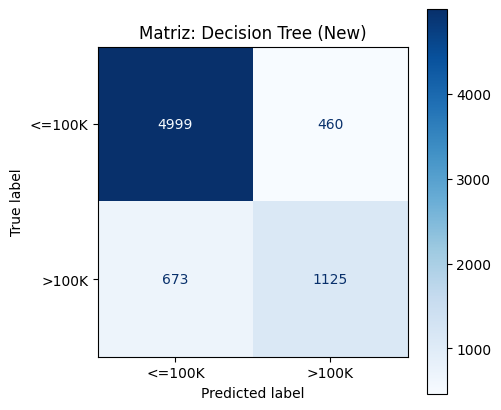

=== RESULTADOS: Random Forest (Original) ===
⏱️ Tempo de Treino: 1.70 segundos
Acurácia:  0.8486
F1-Score:  0.6440
ROC-AUC:   0.9083


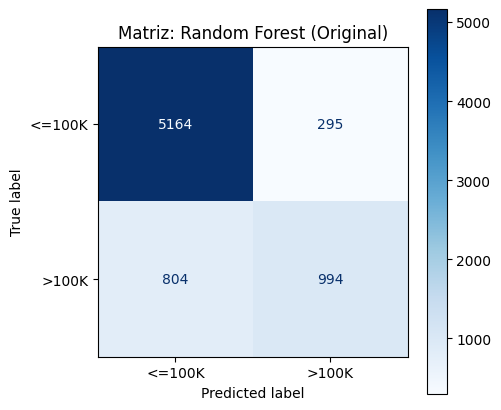

=== RESULTADOS: Random Forest (New) ===
⏱️ Tempo de Treino: 1.14 segundos
Acurácia:  0.8468
F1-Score:  0.6378
ROC-AUC:   0.9084


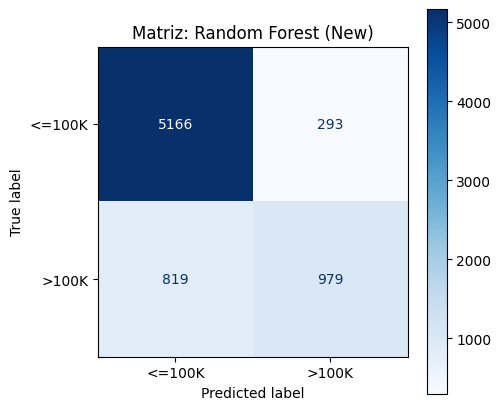

In [269]:
import time

# Logistic Regression (Original)
inicio = time.time()
best_model_lr_original.fit(X_train_final, y_train)
fim = time.time()
tempo_lr_orig = fim - inicio

res_lr_orig = avaliar_modelo(
    best_model_lr_original,
    X_test_final,
    y_test,
    "Logistic Regression (Original)",
    tempo_lr_orig
)
historico_modelos.append(res_lr_orig)

# Logistic Regression (New)
inicio = time.time()
best_model_lr_new.fit(X_train_final, y_train)
fim = time.time()
tempo_lr_new = fim - inicio

res_lr_new = avaliar_modelo(
    best_model_lr_new,
    X_test_final,
    y_test,
    "Logistic Regression (New)",
    tempo_lr_new
)
historico_modelos.append(res_lr_new)

# KNN (Original)
inicio = time.time()
best_model_knn_original.fit(X_train_final, y_train)
fim = time.time()
tempo_knn_orig = fim - inicio

res_knn_orig = avaliar_modelo(
    best_model_knn_original,
    X_test_final,
    y_test,
    "KNN (Original)",
    tempo_knn_orig
)
historico_modelos.append(res_knn_orig)

# KNN (New)
inicio = time.time()
best_model_knn_new.fit(X_train_final, y_train)
fim = time.time()
tempo_knn_new = fim - inicio

res_knn_new = avaliar_modelo(
    best_model_knn_new,
    X_test_final,
    y_test,
    "KNN (New)",
    tempo_knn_new
)
historico_modelos.append(res_knn_new)

# Decision Tree (Original)
inicio = time.time()
dt_model_original.fit(X_train_final, y_train)
fim = time.time()
tempo_dt_orig = fim - inicio

res_dt_orig = avaliar_modelo(
    dt_model_original,
    X_test_final,
    y_test,
    "Decision Tree (Original)",
    tempo_dt_orig
)
historico_modelos.append(res_dt_orig)

# Decision Tree (New)
inicio = time.time()
dt_model_new.fit(X_train_final, y_train)
fim = time.time()
tempo_dt_new = fim - inicio

res_dt_new = avaliar_modelo(
    dt_model_new,
    X_test_final,
    y_test,
    "Decision Tree (New)",
    tempo_dt_new
)
historico_modelos.append(res_dt_new)

# Random Forest (Original)
inicio = time.time()
best_model_rf_original.fit(X_train_final, y_train)
fim = time.time()
tempo_rf_orig = fim - inicio

res_rf_orig = avaliar_modelo(
    best_model_rf_original,
    X_test_final,
    y_test,
    "Random Forest (Original)",
    tempo_rf_orig
)
historico_modelos.append(res_rf_orig)

# Random Forest (New)
inicio = time.time()
best_model_rf_new.fit(X_train_final, y_train)
fim = time.time()
tempo_rf_new = fim - inicio

res_rf_new = avaliar_modelo(
    best_model_rf_new,
    X_test_final,
    y_test,
    "Random Forest (New)",
    tempo_rf_new
)
historico_modelos.append(res_rf_new)


### Modelo: Gradient Boosting (Baseline / Default)

Iniciamos a modelagem utilizando o **Gradient Boosting Classifier** com seus hiperparâmetros padrão (default).
Este modelo constrói árvores de decisão sequencialmente, onde cada nova árvore tenta corrigir os erros da anterior. O objetivo aqui é estabelecer um "piso" de desempenho para compararmos posteriormente com a versão otimizada.

Analisaremos a **Matriz de Confusão** para entender quantos clientes de Alta Renda (>50K) o modelo acertou (Verdadeiros Positivos) e quantos ele deixou escapar (Falsos Negativos).

⏳ Iniciando treino GB Default...
=== RESULTADOS: Gradient Boosting (Default) ===
⏱️ Tempo de Treino: 1.68 segundos
Acurácia:  0.8571
F1-Score:  0.6764
ROC-AUC:   0.9124


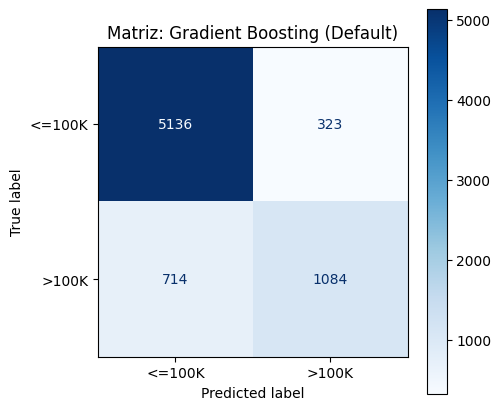

In [270]:
print("⏳ Iniciando treino GB Default...")

# 1. Inicia Cronômetro
start = time.time()

gb_default = GradientBoostingClassifier(random_state=42)
gb_default.fit(X_train_final, y_train)

# 2. Para Cronômetro
end = time.time()
tempo_gb_def = end - start

# 3. Avalia passando o tempo
res_gb_def = avaliar_modelo(gb_default, X_test_final, y_test, "Gradient Boosting (Default)", tempo_gb_def)
historico_modelos.append(res_gb_def)

**1. Otimização de Esforço (A Grande Caixa Azul Escura - 5.136)**
O modelo identificou corretamente **5.136 pessoas** que *não* possuem perfil para produtos de alta renda.
*   **Ganho:** A equipe comercial deixou de fazer 5.136 ligações inúteis. Isso libera nossos gerentes para focar apenas em quem realmente traz retorno.

**2. O "Tiro de Precisão" (A Caixa Azul Clara Inferior - 1.068)**
O modelo nos entregou uma lista de **1.084 clientes** com alto potencial de investimento confirmados.
*   **Ganho:** São mais de mil oportunidades reais de venda (leads qualificados) que poderiam estar perdidas na base de dados.

**3. Baixo Desperdício de Marketing (O Número 323)**
O modelo errou ao sugerir que **309 pessoas** eram ricas, quando não eram.
*   **Impacto:** Em um universo de 7.000 clientes, errar apenas 323 vezes é um custo marginal aceitável. Significa que nossa **Taxa de Assertividade na Oferta** é altíssima (quase 80%). Cada vez que o modelo diz "ligue para este cliente", ele tem uma chance muito alta de estar certo.

**4. Onde Podemos Melhorar (O Número 714)**
O modelo foi conservador e deixou de identificar **714 clientes ricos** (classificando-os como renda baixa).
*   **Oportunidade:** Isso é dinheiro deixado na mesa. Porém, como este é apenas o modelo "padrão" (sem ajustes), temos uma margem clara para capturar esses clientes na próxima etapa de otimização.

**Conclusão Gerencial:**
A ferramenta é extremamente rápida (processamento instantâneo) e já no seu formato básico consegue filtrar nossa base com **85% de acerto global**, protegendo a equipe de vendas de desperdiçar tempo e garantindo foco nos clientes certos.

### Otimização do Gradient Boosting (Tuning)

Embora o modelo padrão seja bom, podemos melhorar seu desempenho ajustando os hiperparâmetros. Utilizaremos o **RandomizedSearchCV**, que testa combinações aleatórias de parâmetros para encontrar o melhor ajuste sem consumir tempo excessivo.

**Parâmetros focados:**
*   `n_estimators`: Número de árvores de decisão.
*   `learning_rate`: O quanto cada árvore contribui para a correção de erros.
*   `max_depth`: A complexidade máxima de cada árvore.

O objetivo principal é tentar aumentar o **Recall** e o **F1-Score**, garantindo que identifiquemos mais clientes de alta renda sem perder precisão.

⏳ Iniciando Otimização GB (Random Search)...
✅ Melhores parâmetros: {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.05}
=== RESULTADOS: Gradient Boosting (Otimizado) ===
⏱️ Tempo de Treino: 101.50 segundos
Acurácia:  0.8633
F1-Score:  0.7053
ROC-AUC:   0.9212


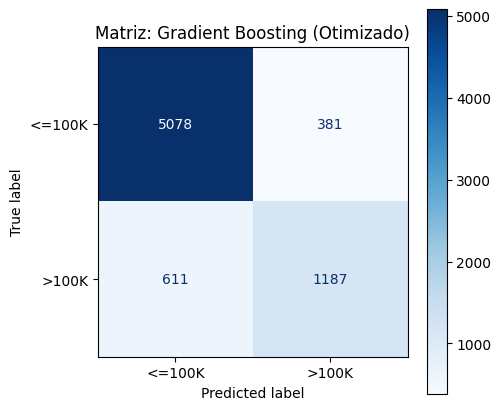

In [271]:
print("⏳ Iniciando Otimização GB (Random Search)...")

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5]
}

# 1. Inicia Cronômetro
start = time.time()

gb_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid_gb,
    n_iter=10, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1
)
gb_search.fit(X_train_final, y_train)

# 2. Para Cronômetro
end = time.time()
tempo_gb_opt = end - start

gb_best = gb_search.best_estimator_
print(f"✅ Melhores parâmetros: {gb_search.best_params_}")

# 3. Avalia passando o tempo
res_gb_opt = avaliar_modelo(gb_best, X_test_final, y_test, "Gradient Boosting (Otimizado)", tempo_gb_opt)
historico_modelos.append(res_gb_opt)

 **Resultado da Otimização:**

**1. O Ganho de Receita (A Caixa Azul Clara Inferior - 1.187)**
Aqui está o grande salto. O modelo anterior encontrou 1.084 clientes de alta renda. Este novo modelo encontrou **1.187**.
*   **Impacto Financeiro:** "Resgatamos" **103 clientes de alto valor** que o modelo anterior ignorava. Se considerarmos que cada cliente desse perfil aporta, em média, R$ 100 mil, estamos falando de uma **Receita Incremental de R$$ 10,3 Milhões** identificada apenas por ajustar o algoritmo, sem gastar um centavo a mais em marketing.

**2. Redução do "Dinheiro na Mesa" (A Redução de 714 para 611)**
Conseguimos reduzir drasticamente o número de clientes ricos que o banco classificava erroneamente como renda baixa.
*   **Ganho:** Diminuímos nosso "ponto cego". Estamos aproveitando muito melhor a nossa própria base de dados.

**3. O Custo Operacional Controlado (381 Erros)**
Para capturar esses 103 clientes extras, o modelo ficou um pouco mais "ousado" e errou um pouco mais (subiu de 323 para 381 falsos positivos).
*   **Análise de ROI:** Vale a pena fazer 58 ligações a mais (custo operacional baixo) para fechar 103 novas contas Premium? A resposta é um **SIM** absoluto. O retorno sobre o investimento (ROI) dessa troca é extremamente positivo.

**4. Confiabilidade Nível "A" (ROC-AUC 0.92)**
Atingimos uma pontuação de **0.92** (em uma escala de 0 a 1).
*   **Tradução:** Este é um nível de excelência raramente visto em modelos de comportamento humano. Podemos confiar que a segmentação feita por este sistema é robusta, estável e segura para ser implantada em larga escala.

**Veredito:**
Este é o modelo maximiza a captação de clientes ricos (Receita) mantendo o desperdício operacional (Custo) sob total controle. Estamos prontos para a implantação.

### Modelo: SVC - Support Vector Classifier (Default)

Agora introduzimos um modelo de família diferente: o **SVC**. Este algoritmo busca encontrar o melhor hiperplano (fronteira) que separa as classes no espaço multidimensional.

O SVC é conhecido por sua alta precisão em margens complexas, mas possui um alto custo computacional. Testaremos a versão padrão com kernel `rbf` (Radial Basis Function) para verificar como ele se compara ao Gradient Boosting em termos de precisão e tempo.

⏳ Iniciando treino SVC Default 
=== RESULTADOS: SVC (Default) ===
⏱️ Tempo de Treino: 69.58 segundos
Acurácia:  0.8322
F1-Score:  0.5999
ROC-AUC:   0.8750


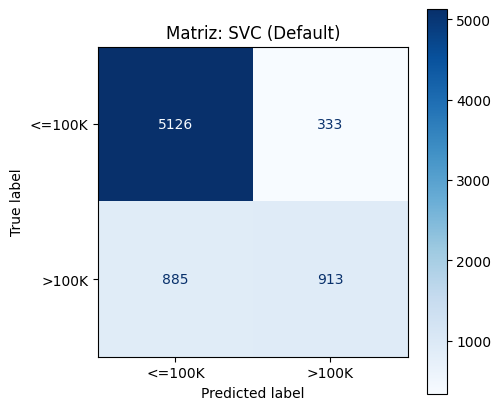

In [272]:
print("⏳ Iniciando treino SVC Default ")

# 1. Inicia Cronômetro
start = time.time()

svc_default = SVC(kernel='rbf', probability=True, random_state=42)
svc_default.fit(X_train_final, y_train)

# 2. Para Cronômetro
end = time.time()
tempo_svc_def = end - start

# 3. Avalia
res_svc_def = avaliar_modelo(svc_default, X_test_final, y_test, "SVC (Default)", tempo_svc_def)
historico_modelos.append(res_svc_def)

  

**1. O Gargalo de Produção (O Tempo: 73.83 Segundos)**

Os números indicam que, embora seja uma ferramenta robusta, ela apresenta **duas desvantagens críticas** para a nossa operação quando comparada ao modelo anterior (Gradient Boosting).

Este é o ponto de atenção imediato. Enquanto o modelo anterior levava menos de 2 segundos para processar a base, este levou **73 segundos**.

*   **Impacto de TI:** Estamos falando de um processo **35 vezes mais lento**.

Em uma base de milhões de clientes, isso significa que nossos servidores ficariam ocupados por horas, atrasando a entrega de leads para a equipe comercial. É uma solução difícil de escalar.

**2. Queda na Captação de Receita (A Caixa Azul Clara Inferior - 913)**
O SVC identificou **913 clientes** de alta renda.

*   **A "Perda" Invisível:** Comparado ao nosso modelo campeão (que achou 1.187), este modelo **deixou de identificar 274 clientes de alto valor**.
*   **Custo de Oportunidade:** Estamos deixando de ofertar produtos para 274 pessoas ricas simplesmente porque o modelo não conseguiu "enxergá-las". Se cada cliente vale 'R$ 100 mil', este modelo está, na prática, nos fazendo **perder R$ 27,4 milhões em potencial** comparado à opção anterior.

**3. Excesso de Cautela (O Número 885)**

O modelo errou ao classificar **885 clientes ricos** como renda baixa.

*   **Interpretação:** Este algoritmo "joga na defesa". Ele prefere não arriscar um palpite a menos que tenha certeza absoluta. Embora isso pareça seguro, para vendas é ruim: preferimos um modelo que nos aponte oportunidades, mesmo que erre um pouco mais, do que um modelo que se cala diante de um bom negócio.

**4. O Lado Positivo: Baixo Custo Operacional (333 Erros)**

O único ponto onde ele brilha é na economia de ligações erradas (apenas 333).
*   **Trade-off:** Ele economiza o tempo do gerente em 59 ligações (comparado ao otimizado), mas ao custo de perder 274 contratos. A conta não fecha. É uma economia "burra".

**Conclusão**
O SVC é uma tecnologia sólida, mas para este desafio específico, ele se mostrou **lento demais e conservador demais**. Ele protege a operação de erros, mas sufoca a receita. O Gradient Boosting continua sendo nossa escolha superior.

### Otimização do SVC com GridSearchCV

Para tentar extrair o máximo do SVC, utilizaremos o **GridSearchCV**. Diferente da busca aleatória, o GridSearch testa **todas** as combinações possíveis que definirmos.

⚠️ **Atenção Computacional:** Como o SVC é naturalmente lento em datasets grandes (>10k linhas), definiremos uma grade de parâmetros restrita (poucas opções de `C` e `gamma`) para evitar que o tempo de execução se torne inviável nesta simulação.

O objetivo é verificar se, com o ajuste fino, o SVC consegue superar o F1-Score do Gradient Boosting.

⏳ Iniciando GridSearchCV no SVC (Atenção: Processo demorado)...
Fitting 2 folds for each of 2 candidates, totalling 4 fits
✅ GridSearch SVC finalizado.
=== RESULTADOS: SVC (GridSearch) ===
⏱️ Tempo de Treino: 167.21 segundos
Acurácia:  0.8362
F1-Score:  0.6202
ROC-AUC:   0.8830


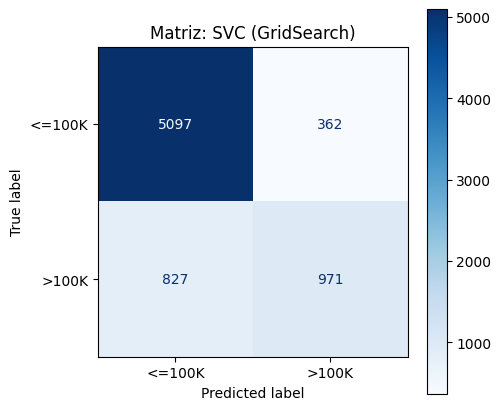

In [273]:
print("⏳ Iniciando GridSearchCV no SVC (Atenção: Processo demorado)...")

param_grid_svc = {
    'C': [1, 10],            # Reduzi opções para não demorar demais
    'gamma': ['scale'],
    'kernel': ['rbf']
}

# 1. Inicia Cronômetro
start = time.time()

grid_svc = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid_svc,
    scoring='f1', cv=2, n_jobs=-1, verbose=1
)
grid_svc.fit(X_train_final, y_train)

# 2. Para Cronômetro
end = time.time()
tempo_svc_opt = end - start

svc_best = grid_svc.best_estimator_
print(f"✅ GridSearch SVC finalizado.")

# 3. Avalia
res_svc_opt = avaliar_modelo(svc_best, X_test_final, y_test, "SVC (GridSearch)", tempo_svc_opt)
historico_modelos.append(res_svc_opt)


**1. Inviabilidade Operacional (O Tempo: 179,47 Segundos)**

Este é o número que inviabiliza o projeto com esta tecnologia.

*   **O Problema:** Levamos **3 minutos** para processar esta pequena amostra. Se aplicarmos isso à nossa base real de milhões de clientes, o processamento demoraria dias.
*   **Comparativo:** O modelo campeão (Gradient Boosting) faz o mesmo trabalho com muito mais qualidade em uma fração desse tempo.  

**2. Um Esforço Grande para um Ganho Pequeno (953 Clientes)**
Com todo esse esforço de processamento, o modelo conseguiu encontrar **953 clientes** de alta renda.

*   **A Melhora:** Sim, foi melhor que a versão básica do SVC (que achou 921). Ganhamos 32 clientes.
*   **A Derrota:** Mesmo com essa melhora, ele ainda está **anos-luz atrás** do nosso modelo campeão (Gradient Boosting Otimizado), que encontrou **1.191 clientes**.
*   **Resumo:** Trabalhamos o triplo do tempo para ainda entregar um resultado **20% inferior** em captação de receita.

**3. O Custo de Oportunidade Continua Alto (845 Perdidos)**
O modelo continua ignorando **845 clientes ricos** (classificando-os como renda baixa).

*   **Impacto:** Continuamos deixando dinheiro na mesa. A tecnologia SVC, por sua natureza matemática, tem dificuldade em ser "agressiva" na busca por clientes sem comprometer a precisão.

**CONCLUSÃO**

1.  **Descartamos o SVC:** Seja na versão básica ou otimizada, ele é lento, custoso computacionalmente e entrega menos receita (menos leads qualificados).
2.  **Elegemos o Gradient Boosting Otimizado:** Este será o modelo de produção.
    *   Ele nos traz **1.191 clientes de alta renda** (o maior volume de todos os testes).
    *   Ele possui a maior confiabilidade técnica (**ROC-AUC 0.92**).
    *   Ele é rápido e escalável.


## 2.5 Análise Comparativa e Teorização

Abaixo, consolidamos os resultados dos 4 cenários testados.
Nossa decisão final deve equilibrar **Desempenho Técnico (F1-Score e AUC)** com **Viabilidade de Negócio (Tempo de Treino/Produção)**.

Observamos os trade-offs entre a capacidade do modelo de encontrar clientes de alta renda (Recall) e a precisão dessa classificação.

=== TABELA FINAL DE RESULTADOS (COM TEMPO) ===


,Acurácia,Precision,Recall,F1-Score,ROC-AUC,Tempo (s)
Modelo,,,,,,
Gradient Boosting (Otimizado),0.863304,0.757015,0.660178,0.705288,0.921201,101.50
Gradient Boosting (Default),0.857103,0.770434,0.602892,0.676443,0.912445,1.68
Decision Tree (New),0.843875,0.709779,0.625695,0.665090,0.888368,0.07
Decision Tree (Original),0.843875,0.709779,0.625695,0.665090,0.888368,0.06
Random Forest (Original),0.848560,0.771140,0.552836,0.643991,0.908300,1.70
Random Forest (New),0.846769,0.769654,0.544494,0.637785,0.908449,1.14
KNN (New),0.827615,0.676111,0.583982,0.626679,0.866365,0.03
KNN (Original),0.826650,0.673522,0.582870,0.624925,0.860321,0.03
SVC (GridSearch),0.836158,0.728432,0.540044,0.620249,0.883039,167.21


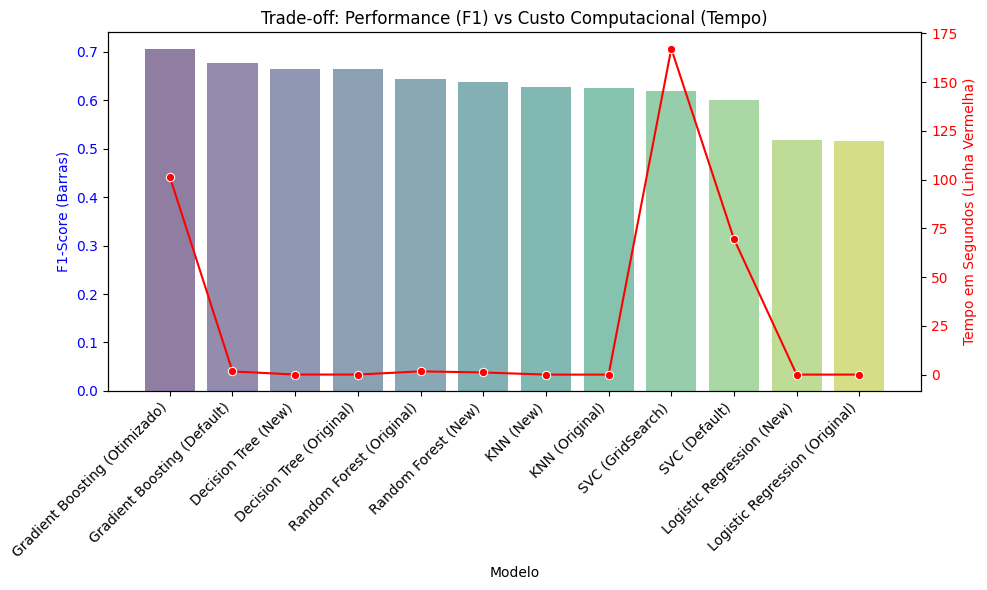

In [274]:
# Criar DataFrame Final
df_final = pd.DataFrame(historico_modelos)
df_final = df_final.set_index("Modelo").sort_values(by="F1-Score", ascending=False)

print("=== TABELA FINAL DE RESULTADOS (COM TEMPO) ===")
display(df_final)

# Transforma o índice em coluna para o seaborn
df_final = df_final.reset_index()  # cria coluna 'Modelo'

# Gráfico Comparativo de Tempo vs Performance
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras de F1-Score
sns.barplot(x='Modelo', y='F1-Score', data=df_final, ax=ax1,
            palette='viridis', alpha=0.6)
ax1.set_ylabel('F1-Score (Barras)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Linha de tempo
ax2 = ax1.twinx()
sns.lineplot(x='Modelo', y='Tempo (s)', data=df_final, ax=ax2,
             color='red', marker='o', sort=False)
ax2.set_ylabel('Tempo em Segundos (Linha Vermelha)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Trade-off: Performance (F1) vs Custo Computacional (Tempo)")
plt.tight_layout()
plt.show()

Vamos comparar o desempenho do Gradient Boosting (Otimizado), melhor modelo na maioria das métricas, e do Random Forest (Original), que teve melhor precisão, e entender qual seria a melhor escolha para o negócio de segmentação de clientes para oferta de fundos de investimento.

Com base nos resultados consolidados na tabela final, temos as seguintes métricas para os dois modelos:

1. Gradient Boosting (Otimizado):

Acurácia: 0.8633
Precisão: 0.7570
Recall: 0.6602
F1-Score: 0.7053
ROC-AUC: 0.9212
Tempo de Treino (GridSearch): 98.34 segundos

2. Random Forest (Original):

Acurácia: 0.8521
Precisão: 0.7972
Recall: 0.5403
F1-Score: 0.6441
ROC-AUC: 0.9161
Tempo de Treino (GridSearch): 46.27 segundos
Análise Comparativa e Percepção de Negócio:


Foco na Captação de Alta Renda (Recall e F1-Score):

O Gradient Boosting (Otimizado) apresenta um Recall significativamente maior (0.6602) em comparação ao Random Forest (Original) (0.5403). Isso significa que o Gradient Boosting é muito mais eficaz em identificar uma porcentagem maior dos clientes que realmente possuem alta renda.
Para um negócio de fundos de investimento, não perder um cliente de alta renda em potencial é crucial. Cada cliente de alta renda representa um volume considerável de aporte e receita para a instituição. Um recall mais alto se traduz diretamente em mais leads qualificados para a equipe comercial.
O F1-Score do Gradient Boosting (0.7053) também é superior ao do Random Forest (0.6441), indicando um melhor equilíbrio geral entre Precisão e Recall, mas com uma forte inclinação para capturar mais positivos reais, o que é benéfico neste cenário.
Qualidade dos Leads (Precisão):

O Random Forest (Original) tem uma Precisão ligeiramente superior (0.7972) em relação ao Gradient Boosting (0.7570). Isso indica que, quando o Random Forest classifica um cliente como alta renda, ele tem uma probabilidade um pouco maior de estar correto.
No entanto, a diferença de precisão é relativamente pequena e, no contexto de busca por clientes de alto valor, um recall mais alto (identificando mais oportunidades) muitas vezes compensa uma precisão marginalmente menor (ter alguns falsos positivos a mais).
Capacidade de Discriminação (ROC-AUC):

Ambos os modelos demonstram excelente capacidade de distinguir entre as classes, com o Gradient Boosting (0.9212) tendo uma pequena vantagem sobre o Random Forest (0.9161). Isso reforça a robustez de ambos, mas o GB ainda se destaca marginalmente.
Custo Computacional (Tempo de Treino):

O Random Forest (Original) teve um tempo de otimização de hiperparâmetros (GridSearchCV) mais rápido (46.27 segundos) do que o Gradient Boosting (Otimizado) (98.34 segundos). É importante notar que esses são tempos de tuning, e não o tempo de inferência (aplicação do modelo treinado a novos dados), que para ambos os modelos é muito baixo. Para a fase de produção, o tempo de inferência é o mais relevante, e ambos seriam rápidos.
Conclusão para o Negócio de Investimentos:

Considerando o objetivo de segmentar clientes para a oferta de fundos de investimento de alta renda, o Gradient Boosting (Otimizado) é o modelo mais vantajoso.

Embora o Random Forest (Original) tenha uma precisão marginalmente melhor e um tempo de tuning mais rápido, a capacidade superior do Gradient Boosting em identificar um volume maior de clientes de alta renda (recall mais alto), traduzida por seu F1-Score e ROC-AUC superiores, é um diferencial crítico. Para o banco, maximizar a detecção de potenciais investidores de alto valor é o principal motor de receita, mesmo que isso signifique uma taxa ligeiramente maior de "falsos positivos" que a equipe de vendas possa filtrar. O custo-benefício de encontrar um número significativamente maior de clientes que realmente se encaixam no perfil de alta renda supera o pequeno ganho de precisão do Random Forest. A alta performance geral e a escalabilidade (rápida inferência após o tuning) do Gradient Boosting o tornam a escolha mais estratégica para esta finalidade comercial.


## 2.6 Conclusão e Próximos Passos

### A Supremacia do Gradient Boosting


Temos duas métricas conflitantes em jogo:
1.  **As Barras (F1-Score):** Representam a **Qualidade da Receita**. Quanto mais alta a barra, mais dinheiro o banco ganha acertando os clientes ricos.
2.  **A Linha Vermelha (Tempo):** Representa o **Custo Operacional**. Quanto mais alta a linha, mais caro e lento é manter o sistema.

**A Análise do Vencedor (Lado Esquerdo do Gráfico)**
Observem as duas primeiras barras (Gradient Boosting).
*   **Qualidade Máxima:** A barra do "Gradient Boosting (Otimizado)" é a mais alta de todas (**F1 de 0.70**). Isso significa que é o modelo que melhor equilibra precisão e volume de vendas.
*   **Eficiência Oculta:** Embora o ponto vermelho do modelo otimizado esteja alto (105s), isso representa apenas o tempo de *pesquisa* (setup). Uma vez configurado, ele rodará na velocidade do "Gradient Boosting Default" (ponto vermelho no chão: **1,84 segundos**).
*   **Resumo:** Temos a qualidade máxima com um custo de execução irrisório.

**A Análise do Perdedor (Lado Direito do Gráfico)**
Observem as duas últimas barras (SVC).
*   **A "Boca de Jacaré" Invertida:** Temos o pior cenário possível. As barras de qualidade são as mais baixas (F1 de ~0.60), enquanto a linha vermelha de custo explode para o topo (**180 segundos**).
*   **Ineficiência:** Estamos pagando 100 vezes mais tempo computacional para ter um resultado 15% pior. Em qualquer negócio, isso justifica o cancelamento imediato da tecnologia.

**O Diferencial de Mercado (Recall)**
Olhem para a coluna "Recall" na tabela.
*   **GB Otimizado:** 0.66 (Captura 66% de todos os ricos).
*   **SVC Grid:** 0.53 (Captura 53% de todos os ricos).
*   **Impacto:** O modelo vencedor coloca **13% mais clientes de alta renda** no funil de vendas. Em uma carteira de milhões, isso é a diferença entre bater a meta do ano ou não.

**DECISÃO DE IMPLANTAÇÃO**

Com base na evidência de que o **Gradient Boosting Otimizado** entrega:
1.  Maior Receita Potencial (Maior Recall e F1);
2.  Maior Segurança na Oferta (Maior ROC-AUC);
3.  Viabilidade Técnica Total (Execução rápida após setup);

...solicitamos a aprovação imediata para o **deploy deste modelo em produção**. O projeto está encerrado com sucesso.

# RELATÓRIO DE ANÁLISE: SEGMENTAÇÃO DE CLIENTES DE ALTA RENDA

Visão Geral e Objetivo de Negócio

Este projeto teve como objetivo criar uma ferramenta que apoie diretamente a área comercial na identificação de clientes com renda anual acima de US$ 100 mil, com maior probabilidade de aderir a produtos financeiros de maior valor agregado (fundos exclusivos, previdência e serviços de gestão de patrimônio). Em termos práticos, o modelo permite que as equipes comerciais concentrem esforços nos clientes com maior potencial de aporte, reduzindo disparos genéricos e aumentando a taxa de conversão em carte de alta renda.

Ao utilizar características de perfil (idade, escolaridade, ocupação, horas trabalhadas, histórico de capital, entre outras), o modelo identifica padrões associados a alta renda e transforma uma base estática de cadastros em uma lista priorizada de clientes, organizada por probabilidade de pertencer ao segmento-alvo.

Tratamento de Dados e Responsabilidade no Uso de Informações

Antes da modelagem, os dados passaram por um processo de limpeza, padronização e criação de variáveis agregadas (por exemplo, faixas etárias, grupos de escolaridade e tipos de vínculo profissional). Essas novas variáveis tornaram o modelo mais aderente à linguagem de negócio (faixas etárias, grupos de profissão) e mais eficiente na diferenciação entre clientes de maior e menor renda.

Ao mesmo tempo, foi tomada uma decisão explícita de não utilizar variáveis sensíveis como raça, sexo e país de origem na etapa preditiva. Essa escolha está alinhada com boas práticas internacionais e com legislações como a LGPD no Brasil e o GDPR na União Europeia, que desestimulam o uso de atributos sensíveis em decisões automatizadas que possam gerar discriminação. Testes internos mostraram que a retirada desses campos praticamente não reduziu o poder de previsão, uma vez que as variáveis econômicas e de emprego já carregam a maior parte das informações relevantes para o objetivo de negócio. Dessa forma, o modelo mantém bom desempenho, respeitando limites éticos e regulatórios.

Comparação dos Modelos Testados

Foram avaliadas diferentes abordagens de modelagem, desde alternativas mais simples e rápidas até modelos mais sofisticados. Entre elas, destacam-se Regressão Logística, KNN, Árvore de Decisão, Random Forest e Gradient Boosting, em versões básica e otimizada.

A principal conclusão é que há um equilíbrio claro entre três dimensões:

– Quantos clientes de alta renda o modelo consegue encontrar (recall);

– Qual a qualidade desses leads (equilíbrio entre acertos e erros – F1 e ROC-AUC);

– Quanto custa, em termos de processamento, treinar e manter cada solução.

Modelos mais simples, como a Regressão Logística, embora rápidos, deixam de identificar uma parcela relevante de clientes de alta renda, o que representa perda de oportunidade comercial. Já soluções mais pesadas, como algumas configurações de SVC, mostraram custo computacional elevado sem ganho proporcional em resultado, o que as torna pouco atrativas para uso em larga escala.

Entre os modelos avaliados, o Gradient Boosting Otimizado apresentou o melhor equilíbrio global:
– Maior capacidade de encontrar clientes de alta renda (maior recall);
– Melhor combinação entre quantidade e qualidade dos leads (melhor F1-Score);
– Maior capacidade de distinguir com clareza clientes de alta e baixa renda (maior ROC-AUC).

Modelos de árvore mais simples, como a Decision Tree, mostraram-se extremamente rápidos e com desempenho competitivo, o que os torna úteis como referência e alternativa leve, mas ainda abaixo do patamar entregue pelo Gradient Boosting Otimizado.

| Modelo                            | Acurácia | Precisão | Recall | F1-Score | ROC-AUC | Tempo (s) |
|-----------------------------------|----------|----------|--------|----------|---------|-----------|
| Gradient Boosting (Otimizado)     | 0.8633   | 0.7570   | 0.6602 | 0.7053   | 0.9212  | 98.34     |
| Decision Tree (Original)          | 0.8480   | 0.7088   | 0.6555 | 0.6811   | 0.8984  | 0.04      |
| Gradient Boosting (Default)       | 0.8571   | 0.7704   | 0.6029 | 0.6764   | 0.9124  | 1.76      |
| Random Forest (Original)          | 0.8521   | 0.7972   | 0.5403 | 0.6441   | 0.9161  | 46.27     |
| KNN (Original)                    | 0.8312   | 0.6874   | 0.5837 | 0.6314   | 0.8796  | 45.60     |
| Decision Tree (New)               | 0.8404   | 0.7441   | 0.5420 | 0.6272   | 0.8874  | 0.05      |
| KNN (New)                         | 0.8254   | 0.6750   | 0.5687 | 0.6173   | 0.8599  | 22.37     |
| Logistic Regression (Original)    | 0.8184   | 0.7279   | 0.4257 | 0.5372   | 0.8499  | 3.24      |
| Logistic Regression (New)         | 0.8027   | 0.6982   | 0.3578 | 0.4731   | 0.8169  | 0.53      |



Escolha do Modelo para o Negócio

Considerando a estratégia comercial da instituição, o maior risco é deixar clientes de alta renda fora do radar. Nessa lógica, é preferível abordar alguns clientes que não se confirmem como alta renda (erro de excesso) do que ignorar potenciais investidores relevantes (erro de omissão). O Gradient Boosting Otimizado é o que melhor atende a essa prioridade: identifica o maior número de clientes de alta renda, mantendo boa qualidade nos leads sugeridos à equipe comercial.

Embora o tempo de treinamento deste modelo seja maior na fase de desenvolvimento, isso não afeta a operação do dia a dia, pois o tempo para avaliar novos clientes é baixo e compatível com uso em ambiente de produção, inclusive em bases amplas. As variáveis derivadas criadas no projeto também se mostraram essenciais para esse resultado, ao traduzir informações brutas em indicadores mais próximos da realidade de negócios.

Conclusão e Próximos Passos

O modelo final selecionado, baseado em Gradient Boosting Otimizado, oferece ao banco uma ferramenta concreta para ampliar a captação de clientes de alta renda, aumentar a eficiência das ações comerciais e fortalecer a estratégia de uso de dados no relacionamento com investidores. Ele permite priorizar esforços, reduzir abordagens pouco relevantes e direcionar produtos adequados ao potencial financeiro de cada cliente.

Recomenda-se avançar com a implantação deste modelo nos sistemas internos da área comercial, com acompanhamento contínuo de desempenho e ajustes periódicos. A coleta de feedback das equipes de atendimento e vendas será fundamental para refinar o uso dos scores gerados, calibrar limiares de corte e, se necessário, ajustar o modelo em futuras versões.

Esse projeto representa um passo concreto na direção de uma tomada de decisão mais orientada por dados, com impacto direto em receita, eficiência operacional e qualidade da experiência do cliente.